In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gilphot as gp

from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [2]:
galaxies = ['NGC3044', 'NGC3432', 'NGC3501', 'NGC3628', 'NGC4010', 'NGC4013', 
            'NGC4307', 'NGC4330', 'NGC4437', 'NGC4565', 'NGC4634', 'NGC5907']

# log(stellar halo mass fraction) after subtracting disk model
# 4 different definitions of stellar halo region of profile; no extrapolation
halo_defs = [r"$r>5R_d$", r"$r>20\mathrm{ kpc}$", r"$\Sigma_*<10^6 M_\odot/\mathrm{kpc}^2$", r"$r>5R_{1/2}$"]

halo_upperlim = []  # No non-detections for edge-on galaxies

In [3]:
# Reading masses and mass fractions from data files
# Error bars include random and systematic sources of error

masses = np.zeros(12)
err_masses = np.zeros(12)

outer_frac = np.zeros((4,12))
err_outer_frac = np.zeros((4,12))

halo_frac = np.zeros((4,12))
err_halo_frac_upper = np.zeros((4,12))
err_halo_frac_lower = np.zeros((4,12))

halo_masses = np.zeros((4,12))
err_halo_masses_upper = np.zeros((4,12))
err_halo_masses_lower = np.zeros((4,12))

for i, gal in enumerate(galaxies):
    
    massfile = f"../{gal}/{gal}-masses-fractions.txt"
    f = open(massfile, 'r')
    lines = f.readlines()[2:]  # Skipping two header lines
    f.close()
    
    for j in range(0,4):
        temp_data = [float(x) for x in lines[j].split()]
        
        masses[i] = temp_data[0]
        err_masses[i] = temp_data[1]
        
        outer_frac[j,i] = temp_data[7]
        err_outer_frac[j,i]= temp_data[8]
        
        halo_frac[j,i] = temp_data[9]
        err_halo_frac_upper[j,i] = temp_data[10]
        err_halo_frac_lower[j,i] = temp_data[11]
        
        halo_masses[j,i] = temp_data[4]
        err_halo_masses_upper[j,i] = temp_data[5]
        err_halo_masses_lower[j,i] = temp_data[6]

In [12]:
DNGS_galaxies = ["NGC1042", "NGC1084", "NGC2903", "NGC3351", "NGC3368", "NGC4220", "NGC4258", "M101"]
DNGS_masses = [10.18, 10.64, 10.69, 10.77, 10.95, 10.79, 10.88, 10.77]
DNGS_err_masses = [0.14, 0.14, 0.14, 0.15, 0.14, 0.14, 0.14, 0.14]

DNGS_outer_frac = np.array([[-1.65, -1.05, -1.28, -1.66, -1.48, -1.29, -1.19, -1.35],
                   [-2.72, -1.55, -1.81, -3.21, -1.92, -1.95, -1.17, -1.23],
                   [-1.98, -1.71, -2.14, -2.40, -2.18, -2.01, -1.90, -2.06],
                   [-4.57, -1.42, -1.73, -1.36, -1.21, -1.56, -1.22, -1.28]
                  ])

DNGS_err_outer_frac = np.array([[0.14, 0.14, 0.14, 0.15, 0.14, 0.14, 0.14, 0.15],
                       [0.15, 0.15, 0.15, 0.18, 0.14, 0.14, 0.14, 0.14],
                       [0.14, 0.15, 0.15, 0.16, 0.15, 0.14, 0.14, 0.15],
                       [0.59, 0.14, 0.15, 0.15, 0.14, 0.14, 0.14, 0.15]])

DNGS_halo_frac = np.array([[np.nan, -1.30, -2.08, np.nan, -2.50, -1.81, -2.01, -2.10],
                  [np.nan, -1.56, -2.10, np.nan, -2.45, -1.98, -2.02, -2.01],
                  [np.nan, -1.72, -2.27, np.nan, -2.47, -2.03, -2.06, np.nan],
                  [np.nan, -1.45, -2.07, np.nan, -2.39, -1.77, -2.00, -2.03]])

DNGS_err_halo_frac_upper = np.array([[np.nan, 0.15, 0.15, np.nan, 0.14, 0.14, 0.14, 0.15],
                            [np.nan, 0.17, 0.15, np.nan, 0.14, 0.15, 0.14, 0.15],
                            [np.nan, 0.18, 0.16, np.nan, 0.15, 0.16, 0.19, np.nan],
                            [np.nan, 0.16, 0.15, np.nan, 0.15, 0.15, 0.14, 0.15]])

DNGS_err_halo_frac_lower = np.array([[np.nan, 0.15, 0.23, np.nan, 0.15, 0.14, 0.20, 0.15],
                            [np.nan, 0.18, 0.49, np.nan, 0.19, 0.16, 0.20, 0.15],
                            [np.nan, 0.19, 0.70, np.nan, 0.24, 0.16, 0.51, np.nan],
                            [np.nan, 0.17, 0.45, np.nan, 0.14, 0.15, 0.21, 0.15]])

DNGS_halo_mass = np.array([[np.nan, 9.48, 8.61, np.nan, 8.45, 9.20, 9.12, 8.67],
                           [np.nan, 9.22, 8.59, np.nan, 8.50, 9.03, 9.11, 8.76],
                           [np.nan, 9.06, 8.42, np.nan, 8.48, 8.98, 9.07, np.nan],
                           [np.nan, 9.33, 8.62, np.nan, 8.56, 9.24, 9.13, 8.74]])


DNGS_err_halo_mass_upper = np.array([[np.nan, 0.05, 0.05, np.nan, 0.03, 0.04, 0.04, 0.06],
                            [np.nan, 0.10, 0.06, np.nan, 0.04, 0.07, 0.04, 0.05],
                            [np.nan, 0.11, 0.07, np.nan, 0.05, 0.07, 0.13, np.nan],
                            [np.nan, 0.08, 0.06, np.nan, 0.04, 0.05, 0.04, 0.06]])


DNGS_err_halo_mass_lower = np.array([[np.nan, 0.06, 0.19, np.nan, 0.06, 0.04, 0.15, 0.06],
                            [np.nan, 0.11, 0.47, np.nan, 0.13, 0.07, 0.14, 0.05],
                            [np.nan, 0.13, 0.69, np.nan, 0.19, 0.08, 0.49, np.nan],
                            [np.nan, 0.09, 0.43, np.nan, 0.03, 0.05, 0.16, 0.06]])

In [13]:
# Adopting total stellar masses from S4G; converting mass fractions accordingly

masses_S4G = [10.26, 9.68, 10.16, 10.80, 9.91, 10.63, 10.37, 9.91, 10.23, 10.88, 9.81+0.31, 10.87]
DNGS_masses_S4G = [10.18-0.1913, 10.619, 10.665, 10.486, 10.725, 10.362, 10.672, 10.622]

In [6]:
# Finding empirical correction for NGC 4634 --> S4G mass seems underestimated

temp_diffs = np.array([10.259, 9.681, 10.165, 10.805, 9.914, 10.630, 10.372, 9.914, 10.226, 10.882, 10.871]) - np.array([9.78, 9.24, 9.94, 10.47, 9.58, 10.43, 10.24, 9.72, 9.89, 10.47, 10.51])
    
print(np.median(temp_diffs))
print(np.mean(temp_diffs))

0.3349999999999991
0.31354545454545435


In [7]:
# Finding empirical correction for NGC 1042 

temp_diffs = np.array([10.619, 10.665, 10.486, 10.725, 10.362, 10.672, 10.622]) - np.array([10.64, 10.69, 10.77, 10.95, 10.79, 10.88, 10.77])

print(np.median(temp_diffs))
print(np.mean(temp_diffs))

-0.20800000000000018
-0.1912857142857141


Above errors are d(log(frac)); converting to log(dfrac)

$$ \Delta(log(f)) = log(e) \Delta f/f $$

$$ \Delta f = \Delta(log(f)) \times f / log(e) $$

In [14]:
# First switching over to S4G for total stellar masses
halo_frac_S4G = np.array(halo_frac) + np.array(masses) - np.array(masses_S4G)
err_halo_frac_S4G_upper = np.sqrt(np.power(err_halo_frac_upper,2) - np.power(err_masses,2) + 0.20**2)
err_halo_frac_S4G_lower = np.sqrt(np.power(err_halo_frac_lower,2) - np.power(err_masses,2) + 0.20**2)

outer_frac_S4G = np.array(outer_frac) + np.array(masses) - np.array(masses_S4G)
err_outer_frac_S4G = np.sqrt(np.power(err_outer_frac,2) - np.power(err_masses,2) + 0.20**2)


# Converting error bars for outer mass frac
lin_err_outer_frac_S4G = np.zeros((4, 2, 12))
err_outer_frac_temp = np.power(10, outer_frac_S4G) * err_outer_frac_S4G / np.log10(np.e)

lowerlim = outer_frac_S4G - np.log10(np.power(10, outer_frac_S4G) - err_outer_frac_temp)
np.nan_to_num(lowerlim, nan=8, copy=False)

upperlim = np.log10(np.power(10, outer_frac_S4G) + err_outer_frac_temp) - outer_frac_S4G 

for x in range(0,4):   
    lin_err_outer_frac_S4G [x,0,:] = lowerlim[x]
    lin_err_outer_frac_S4G [x,1,:] = upperlim[x]


# Converting error bars for stellar halo mass frac
lin_err_halo_frac_S4G = np.zeros((4, 2, 12))

err_halo_frac_temp = np.power(10, halo_frac_S4G) * err_halo_frac_S4G_lower / np.log10(np.e)
lowerlim = halo_frac_S4G - np.log10(np.power(10, halo_frac_S4G) - err_halo_frac_temp)
np.nan_to_num(lowerlim, nan=8, copy=False)

err_halo_frac_temp = np.power(10, halo_frac_S4G) * err_halo_frac_S4G_upper / np.log10(np.e)
upperlim = np.log10(np.power(10, halo_frac_S4G) + err_halo_frac_temp) - halo_frac_S4G 

for x in range(0,4):   
    lin_err_halo_frac_S4G [x,0,:] = lowerlim[x]
    lin_err_halo_frac_S4G [x,1,:] = upperlim[x]
    
    
# Converting error bars for stellar halo mass
lin_err_halo_mass = np.zeros((4, 2, 12))

err_halo_mass_temp = np.power(10, halo_masses) * err_halo_masses_lower / np.log10(np.e)
lowerlim = halo_masses - np.log10(np.power(10, halo_masses) - err_halo_mass_temp)
np.nan_to_num(lowerlim, nan=8, copy=False)

err_halo_mass_temp = np.power(10, halo_masses) * err_halo_masses_upper / np.log10(np.e)
upperlim = np.log10(np.power(10, halo_masses) + err_halo_mass_temp) - halo_masses 

for x in range(0,4):   
    lin_err_halo_mass [x,0,:] = lowerlim[x]
    lin_err_halo_mass [x,1,:] = upperlim[x]

/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  
/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10
/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in log10


In [15]:
# Same for DNGS galaxies

#Switching over to S4G for total stellar masses
DNGS_halo_frac_S4G = np.array(DNGS_halo_frac) + np.array(DNGS_masses) - np.array(DNGS_masses_S4G)
DNGS_err_halo_frac_S4G_upper = np.sqrt(np.power(DNGS_err_halo_frac_upper,2) - np.power(DNGS_err_masses,2) + 0.20**2)
DNGS_err_halo_frac_S4G_lower = np.sqrt(np.power(DNGS_err_halo_frac_lower,2) - np.power(DNGS_err_masses,2) + 0.20**2)

DNGS_outer_frac_S4G = np.array(DNGS_outer_frac) + np.array(DNGS_masses) - np.array(DNGS_masses_S4G)
DNGS_err_outer_frac_S4G = np.sqrt(np.power(DNGS_err_outer_frac,2) - np.power(DNGS_err_masses,2) + 0.20**2)


# Converting error bars for outer mass frac
lin_DNGS_err_outer_frac_S4G = np.zeros((4, 2, 8))
DNGS_err_outer_frac_temp = np.power(10, DNGS_outer_frac_S4G) * DNGS_err_outer_frac_S4G / np.log10(np.e)

lowerlim = DNGS_outer_frac_S4G - np.log10(np.power(10, DNGS_outer_frac_S4G) - DNGS_err_outer_frac_temp)
np.nan_to_num(lowerlim, nan=8, copy=False)

upperlim = np.log10(np.power(10, DNGS_outer_frac_S4G) + DNGS_err_outer_frac_temp) - DNGS_outer_frac_S4G 

for x in range(0,4):   
    lin_DNGS_err_outer_frac_S4G [x,0,:] = lowerlim[x]
    lin_DNGS_err_outer_frac_S4G [x,1,:] = upperlim[x]


# Converting error bars for stellar halo mass frac
lin_DNGS_err_halo_frac_S4G = np.zeros((4, 2, 8))

DNGS_err_halo_frac_temp = np.power(10, DNGS_halo_frac_S4G) * DNGS_err_halo_frac_S4G_lower / np.log10(np.e)
lowerlim = DNGS_halo_frac_S4G - np.log10(np.power(10, DNGS_halo_frac_S4G) - DNGS_err_halo_frac_temp)
np.nan_to_num(lowerlim, nan=8, copy=False)

DNGS_err_halo_frac_temp = np.power(10, DNGS_halo_frac_S4G) * DNGS_err_halo_frac_S4G_upper / np.log10(np.e)
upperlim = np.log10(np.power(10, DNGS_halo_frac_S4G) + DNGS_err_halo_frac_temp) - DNGS_halo_frac_S4G 

for x in range(0,4):   
    lin_DNGS_err_halo_frac_S4G [x,0,:] = lowerlim[x]
    lin_DNGS_err_halo_frac_S4G [x,1,:] = upperlim[x]
    
    
# Converting error bars for stellar halo mass
lin_DNGS_err_halo_mass = np.zeros((4, 2, 8))

err_halo_mass_temp = np.power(10, DNGS_halo_mass) * DNGS_err_halo_mass_lower / np.log10(np.e)
lowerlim = DNGS_halo_mass - np.log10(np.power(10, DNGS_halo_mass) - err_halo_mass_temp)
np.nan_to_num(lowerlim, nan=8, copy=False)

err_halo_mass_temp = np.power(10, DNGS_halo_mass) * DNGS_err_halo_mass_upper / np.log10(np.e)
upperlim = np.log10(np.power(10, DNGS_halo_mass) + err_halo_mass_temp) - DNGS_halo_mass

for x in range(0,4):   
    lin_DNGS_err_halo_mass [x,0,:] = lowerlim[x]
    lin_DNGS_err_halo_mass [x,1,:] = upperlim[x]

/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log10
/home/cgilhuly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in log10


### Literature values

In [8]:
GHOSTS_galaxies = ["NGC253", "NGC891", "NGC3031", "NGC4565", "NGC4945", "NGC7814"]
GHOSTS_masses = [10.74, 10.72, 10.75, 10.90, 10.58, 10.65]
GHOSTS_err_masses = [0.11, 0.11, 0.11, 0.11, 0.11, 0.11]

GHOSTS_halo_frac = [-1.58, -1.79, -2.18, -2.05, -1.53, -1.34]
GHOSTS_err_halo_frac = [[0.11, 0.11, 0.11, 0.11, 0.11, 0.12],
                        [0.12, 0.11, 0.12, 0.11, 0.11, 0.14]]
GHOSTS_err_halo_frac_sys = np.sqrt(np.array(GHOSTS_err_halo_frac)**2 + (np.log(np.e)*0.3)**2)

GHOSTS_halo_frac_extrap = [-1.08, -1.29, -1.69, -1.55, -1.04, -0.85]
GHOSTS_err_halo_frac_extrap = [[0.11, 0.11, 0.11, 0.11, 0.11, 0.12],
                               [0.12, 0.11, 0.12, 0.11, 0.11, 0.14]]

# Errors in linear space:

lin_GHOSTS_err_halo_frac = np.zeros((2,6))

temp_err_l = np.power(10, GHOSTS_halo_frac_extrap) * GHOSTS_err_halo_frac_extrap[0] / np.log10(np.e)
temp_err_u = np.power(10, GHOSTS_halo_frac_extrap) * GHOSTS_err_halo_frac_extrap[1] / np.log10(np.e)
temp_lowerlim = GHOSTS_halo_frac_extrap - np.log10(np.power(10, GHOSTS_halo_frac_extrap) - temp_err_l)
np.nan_to_num(temp_lowerlim, nan=8, copy=False)
temp_upperlim = np.log10(np.power(10, GHOSTS_halo_frac_extrap) + temp_err_u) - GHOSTS_halo_frac_extrap

lin_GHOSTS_err_halo_frac = [temp_lowerlim, temp_upperlim]


lin_GHOSTS_err_halo_frac_sys = np.zeros((2,6))

temp_err_l = np.power(10, GHOSTS_halo_frac) * GHOSTS_err_halo_frac_sys[0] / np.log10(np.e)
temp_err_u = np.power(10, GHOSTS_halo_frac) * GHOSTS_err_halo_frac_sys[1] / np.log10(np.e)
temp_lowerlim = GHOSTS_halo_frac - np.log10(np.power(10, GHOSTS_halo_frac) - temp_err_l)
np.nan_to_num(temp_lowerlim, nan=8, copy=False)
temp_upperlim = np.log10(np.power(10, GHOSTS_halo_frac) + temp_err_u) - GHOSTS_halo_frac

lin_GHOSTS_err_halo_frac_sys = [temp_lowerlim, temp_upperlim]

In [9]:
# Jang et al. 2020 
M101_masses = [10.61]
M101_err_masses = [0.13]
M101_halo_frac = [-2.70]
M101_err_halo_frac = [[0.17],[0.22]]
lin_M101_err_halo_frac = [[0.22],[0.18]]

## The plots!

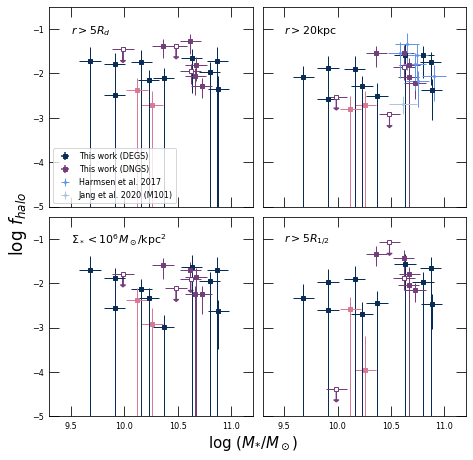

In [10]:
# Showing GHOSTS mass fracs using M_10-40kpc instead of extrapolated total accreted mass

fig, ax = plt.subplots(2,2)
plt.subplots_adjust(hspace=0.05, wspace=0.05)

gals_noHalo = ["NGC1042", "NGC3351", "M101"]
gals_trickyFields = ["NGC3044", "NGC4634"]  #NGC4437


for i, axis in enumerate(ax.flatten()):
    
    axis.annotate(halo_defs[i], (9.5, -1.1), size=11)
    
    #for j in range(4):
    #    if j != i:
    #        axis.scatter(masses_S4G, halo_frac_S4G[j], color="#092c56", s=2)
    
    for k in range(len(galaxies)):
        if galaxies[k] in gals_noHalo:
            axis.errorbar(masses_S4G[k], halo_frac_S4G[i][k], xerr=0.10, yerr=lin_err_halo_frac_S4G[i,:,k].reshape(2,1), fmt='s', ms=4, color='#092c56', mfc='white', elinewidth=1)
            
        elif galaxies[k] in gals_trickyFields:
            axis.errorbar(masses_S4G[k], halo_frac_S4G[i][k], xerr=0.10, yerr=lin_err_halo_frac_S4G[i,:,k].reshape(2,1), fmt='s', ms=4, color='#d97996', elinewidth=1)
            
        else:
            axis.errorbar(masses_S4G[k], halo_frac_S4G[i][k], xerr=0.10, yerr=lin_err_halo_frac_S4G[i,:,k].reshape(2,1), fmt='s', ms=4, color='#092c56', elinewidth=1)
       
    # DNGS (Merritt+2016)
    #for j in range(4):
    #    if j != i:
    #        axis.scatter(DNGS_masses_S4G, DNGS_halo_frac_S4G[j], color="#733e7a", s=2)

    for k in range(len(DNGS_galaxies)):
        if DNGS_galaxies[k] in gals_noHalo:
            axis.errorbar(DNGS_masses_S4G[k], DNGS_halo_frac_S4G[i][k], xerr=0.10, yerr=lin_DNGS_err_halo_frac_S4G[i,:,k].reshape(2,1), fmt='s', ms=4,  color='#733e7a', mfc='white', elinewidth=1)

            if not np.isfinite(DNGS_halo_frac_S4G[i][k]):
                axis.errorbar(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], xerr=0.10, fmt='s', ms=4, color='#733e7a', mfc='white', elinewidth=1)
                axis.arrow(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], 0, -0.25, head_length=0.05, head_width=0.05, color='#733e7a')

        elif DNGS_galaxies[k] in gals_trickyFields:
            axis.errorbar(DNGS_masses_S4G[k], DNGS_halo_frac_S4G[i][k], xerr=0.10, yerr=lin_DNGS_err_halo_frac_S4G[i,:,k].reshape(2,1), fmt='s', ms=4, color='#cd5176', elinewidth=1)

            if not np.isfinite(DNGS_halo_frac_S4G[i][k]):
                axis.errorbar(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], xerr=0.10, fmt='s', ms=4, color='#cd5176', elinewidth=1)
                axis.arrow(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], 0, -0.25, head_length=0.05, head_width=0.05, color='#cd5176')

        else:
            axis.errorbar(DNGS_masses_S4G[k], DNGS_halo_frac_S4G[i][k], xerr=0.10, yerr=lin_DNGS_err_halo_frac_S4G[i,:,k].reshape(2,1), fmt='s', ms=4, color='#733e7a', elinewidth=1)  

            if not np.isfinite(DNGS_halo_frac_S4G[i][k]):
                axis.errorbar(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], xerr=0.10, fmt='s', ms=4, color='#733e7a', elinewidth=1)
                axis.arrow(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], 0, -0.25, head_length=0.05, head_width=0.05, color='#733e7a')
     

    # Plotting additional obs/simulations matching each definition of stellar halo dominated region
        
    if i == 1:       
        # GHOSTS (Harmsen+2017)
        axis.errorbar(GHOSTS_masses, GHOSTS_halo_frac, xerr=GHOSTS_err_masses, yerr=lin_GHOSTS_err_halo_frac_sys, fmt='o', markersize=2, elinewidth=1, color='cornflowerblue') # label="Harmsen et al. 2017"
        
        # M101 (Dragonfly + HST; Jang+2020)
        # Exponential disc + fixed slope power law halo; halo integrated from 40-70 kpc
        # Doesn't really line up with any 
        axis.errorbar(M101_masses, M101_halo_frac, xerr=M101_err_masses, yerr=lin_M101_err_halo_frac, fmt='o', markersize=2, elinewidth=1, color='lightsteelblue') # label="Jang et al. 2020 (M101)"

    
    # Legends
    if i == 0:
        # Legend for observations
        axis.errorbar([0],[0], xerr=0.10, yerr=0.10, fmt='s', ms=4, color='#092c56', label="This work (DEGS)")
        axis.errorbar([0],[0], xerr=0.10, yerr=0.10, fmt='s', ms=4, color='#733e7a', label="This work (DNGS)")
        axis.errorbar([0],[0], xerr=0.10, yerr=0.10, fmt='o', ms=2, elinewidth=1, color='cornflowerblue', label="Harmsen et al. 2017")
        axis.errorbar([0],[0], xerr=0.10, yerr=0.10, fmt='o', ms=2, elinewidth=1, color='lightsteelblue', label="Jang et al. 2020 (M101)")
        
        axis.legend(loc=3, fontsize=8)
    
    axis.set_xlim(9.3,11.2)
    axis.set_xticks([9.5, 10, 10.5, 11])
    
    axis.set_ylim(-5, -0.5)
    axis.set_yticks([-5., -4., -3., -2., -1.])
    
    axis.yaxis.set_tick_params(which='major',size=10,pad=5, right=True, direction="in")
    axis.xaxis.set_tick_params(which='major',size=10,pad=5, top=True, direction="in")
    axis.tick_params(labelsize=8)

ax[0,0].set_xticklabels([])
ax[0,1].set_yticklabels([])
ax[0,1].set_xticklabels([])
ax[1,1].set_yticklabels([])

#ax[1,0].set_xticklabels(["9.0", "9.5", "10.0", "10.5", ""])

fig.text(0.44, 0.01, "log $(M_{*}/M_\odot)$", size=15)
fig.text(0.01, 0.45, r"log $f_{halo}$", size=17, rotation=90)

fig.set_size_inches(6.5, 6.25)
plt.subplots_adjust(left=0.1, right=0.99, top=0.99, bottom=0.08)
#plt.savefig(f"stellar_halo_fraction_vs_mass_small.pdf", dpi=300)
plt.show()

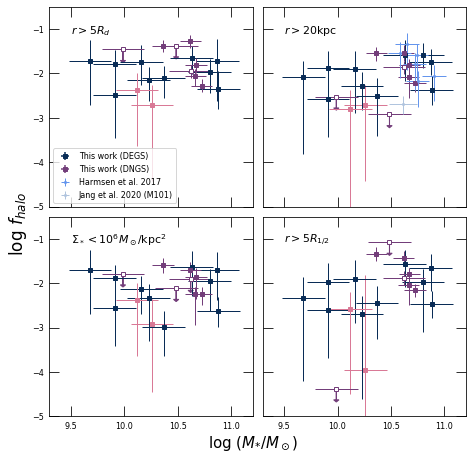

In [17]:
# Showing GHOSTS mass fracs using M_10-40kpc instead of extrapolated total accreted mass

fig, ax = plt.subplots(2,2)
plt.subplots_adjust(hspace=0.05, wspace=0.05)

gals_noHalo = ["NGC1042", "NGC3351", "M101"]
gals_trickyFields = ["NGC3044", "NGC4634"]  #NGC4437


for i, axis in enumerate(ax.flatten()):
    
    axis.annotate(halo_defs[i], (9.5, -1.1), size=11)
    
    #for j in range(4):
    #    if j != i:
    #        axis.scatter(masses_S4G, halo_frac_S4G[j], color="#092c56", s=2)
    
    for k in range(len(galaxies)):
        if galaxies[k] in gals_noHalo:
            axis.errorbar(masses_S4G[k], halo_frac_S4G[i][k], xerr=0.20, yerr=[[err_halo_frac_lower[i,k]], [err_halo_frac_upper[i,k]]], fmt='s', ms=4, color='#092c56', mfc='white', elinewidth=1)
            
        elif galaxies[k] in gals_trickyFields:
            axis.errorbar(masses_S4G[k], halo_frac_S4G[i][k], xerr=0.20, yerr=[[err_halo_frac_lower[i,k]], [err_halo_frac_upper[i,k]]], fmt='s', ms=4, color='#d97996', elinewidth=1)
            
        else:
            axis.errorbar(masses_S4G[k], halo_frac_S4G[i][k], xerr=0.20, yerr=[[err_halo_frac_lower[i,k]], [err_halo_frac_upper[i,k]]], fmt='s', ms=4, color='#092c56', elinewidth=1)
       
    # DNGS (Merritt+2016)
    #for j in range(4):
    #    if j != i:
    #        axis.scatter(DNGS_masses_S4G, DNGS_halo_frac_S4G[j], color="#733e7a", s=2)

    for k in range(len(DNGS_galaxies)):
        if DNGS_galaxies[k] in gals_noHalo:
            axis.errorbar(DNGS_masses_S4G[k], DNGS_halo_frac_S4G[i][k], xerr=0.20, yerr=[[DNGS_err_halo_frac_lower[i,k]], [DNGS_err_halo_frac_upper[i,k]]], fmt='s', ms=4,  color='#733e7a', mfc='white', elinewidth=1)

            if not np.isfinite(DNGS_halo_frac_S4G[i][k]):
                axis.errorbar(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], xerr=0.20, fmt='s', ms=4, color='#733e7a', mfc='white', elinewidth=1)
                axis.arrow(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], 0, -0.25, head_length=0.05, head_width=0.05, color='#733e7a')

        elif DNGS_galaxies[k] in gals_trickyFields:
            axis.errorbar(DNGS_masses_S4G[k], DNGS_halo_frac_S4G[i][k], xerr=0.20, yerr=[[DNGS_err_halo_frac_lower[i,k]], [DNGS_err_halo_frac_upper[i,k]]], fmt='s', ms=4, color='#cd5176', elinewidth=1)

            if not np.isfinite(DNGS_halo_frac_S4G[i][k]):
                axis.errorbar(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], xerr=0.20, fmt='s', ms=4, color='#cd5176', elinewidth=1)
                axis.arrow(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], 0, -0.25, head_length=0.05, head_width=0.05, color='#cd5176')

        else:
            axis.errorbar(DNGS_masses_S4G[k], DNGS_halo_frac_S4G[i][k], xerr=0.10, yerr=[[DNGS_err_halo_frac_lower[i,k]], [DNGS_err_halo_frac_upper[i,k]]], fmt='s', ms=4, color='#733e7a', elinewidth=1)  

            if not np.isfinite(DNGS_halo_frac_S4G[i][k]):
                axis.errorbar(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], xerr=0.20, fmt='s', ms=4, color='#733e7a', elinewidth=1)
                axis.arrow(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], 0, -0.25, head_length=0.05, head_width=0.05, color='#733e7a')
     

    # Plotting additional obs/simulations matching each definition of stellar halo dominated region
        
    if i == 1:       
        # GHOSTS (Harmsen+2017)
        axis.errorbar(GHOSTS_masses, GHOSTS_halo_frac, xerr=GHOSTS_err_masses, yerr=lin_GHOSTS_err_halo_frac_sys, fmt='o', markersize=2, elinewidth=1, color='cornflowerblue') # label="Harmsen et al. 2017"
        
        # M101 (Dragonfly + HST; Jang+2020)
        # Exponential disc + fixed slope power law halo; halo integrated from 40-70 kpc
        # Doesn't really line up with any 
        axis.errorbar(M101_masses, M101_halo_frac, xerr=M101_err_masses, yerr=lin_M101_err_halo_frac, fmt='o', markersize=2, elinewidth=1, color='lightsteelblue') # label="Jang et al. 2020 (M101)"

    
    # Legends
    if i == 0:
        # Legend for observations
        axis.errorbar([0],[0], xerr=0.10, yerr=0.10, fmt='s', ms=4, color='#092c56', label="This work (DEGS)")
        axis.errorbar([0],[0], xerr=0.10, yerr=0.10, fmt='s', ms=4, color='#733e7a', label="This work (DNGS)")
        axis.errorbar([0],[0], xerr=0.10, yerr=0.10, fmt='o', ms=2, elinewidth=1, color='cornflowerblue', label="Harmsen et al. 2017")
        axis.errorbar([0],[0], xerr=0.10, yerr=0.10, fmt='o', ms=2, elinewidth=1, color='lightsteelblue', label="Jang et al. 2020 (M101)")
        
        axis.legend(loc=3, fontsize=8)
    
    axis.set_xlim(9.3,11.2)
    axis.set_xticks([9.5, 10, 10.5, 11])
    
    axis.set_ylim(-5, -0.5)
    axis.set_yticks([-5., -4., -3., -2., -1.])
    
    axis.yaxis.set_tick_params(which='major',size=10,pad=5, right=True, direction="in")
    axis.xaxis.set_tick_params(which='major',size=10,pad=5, top=True, direction="in")
    axis.tick_params(labelsize=8)

ax[0,0].set_xticklabels([])
ax[0,1].set_yticklabels([])
ax[0,1].set_xticklabels([])
ax[1,1].set_yticklabels([])

#ax[1,0].set_xticklabels(["9.0", "9.5", "10.0", "10.5", ""])

fig.text(0.44, 0.01, "log $(M_{*}/M_\odot)$", size=15)
fig.text(0.01, 0.45, r"log $f_{halo}$", size=17, rotation=90)

fig.set_size_inches(6.5, 6.25)
plt.subplots_adjust(left=0.1, right=0.99, top=0.99, bottom=0.08)
plt.savefig(f"stellar_halo_fraction_vs_mass_small.pdf", dpi=300)
plt.show()

In [62]:
# Generating table entries for LaTeX
for n in range(0,12):
    
    tablerow = f"{galaxies[n]}"
    for f, err, f2, err2a, err2b, mhalo, errha, errhb in zip(outer_frac_S4G[:,n], err_outer_frac[:,n], 
                                                             halo_frac_S4G[:,n], err_halo_frac_upper[:,n], err_halo_frac_lower[:,n],
                                                             halo_masses[:,n], err_halo_masses_upper[:,n], err_halo_masses_lower[:,n]):
    
        #print(err, err2, errh)
        tablerow = tablerow + f" & ${f:.1f}\pm{err:.1f}$ & ${f2:.1f}^{{+{err2a:.1f}}}_{{-{err2b:.1f}}}$ & ${mhalo:.1f}^{{+{errha:.1f}}}_{{-{errhb:.1f}}}$"
        
    tablerow = tablerow + " \\\\"
    print(tablerow)

NGC3044 & $-2.4\pm0.4$ & $-2.7^{+0.4}_{-1.7}$ & $7.6^{+0.4}_{-1.7}$ & $-2.4\pm0.4$ & $-2.7^{+0.4}_{-1.7}$ & $7.6^{+0.4}_{-1.7}$ & $-2.2\pm0.5$ & $-2.9^{+0.6}_{-1.5}$ & $7.3^{+0.5}_{-1.5}$ & $-3.9\pm2.1$ & $-4.0^{+2.1}_{-3.4}$ & $6.3^{+2.1}_{-3.4}$ \\
NGC3432 & $-1.5\pm0.4$ & $-1.7^{+0.5}_{-1.0}$ & $8.0^{+0.4}_{-1.0}$ & $-2.1\pm0.3$ & $-2.1^{+0.4}_{-1.7}$ & $7.6^{+0.3}_{-1.7}$ & $-1.5\pm0.4$ & $-1.7^{+0.5}_{-1.0}$ & $8.0^{+0.4}_{-1.0}$ & $-2.3\pm0.4$ & $-2.3^{+0.5}_{-1.9}$ & $7.4^{+0.4}_{-1.9}$ \\
NGC3501 & $-1.2\pm0.4$ & $-1.7^{+0.4}_{-0.5}$ & $8.4^{+0.3}_{-0.5}$ & $-1.9\pm0.3$ & $-1.9^{+0.4}_{-1.0}$ & $8.3^{+0.4}_{-1.0}$ & $-1.5\pm0.3$ & $-2.1^{+0.3}_{-0.5}$ & $8.0^{+0.2}_{-0.5}$ & $-1.9\pm0.3$ & $-1.9^{+0.4}_{-1.0}$ & $8.3^{+0.4}_{-1.0}$ \\
NGC3628 & $-1.5\pm0.3$ & $-2.0^{+0.3}_{-0.5}$ & $8.8^{+0.2}_{-0.4}$ & $-1.0\pm0.2$ & $-1.6^{+0.3}_{-0.3}$ & $9.2^{+0.2}_{-0.2}$ & $-1.7\pm0.3$ & $-2.0^{+0.3}_{-0.7}$ & $8.8^{+0.2}_{-0.6}$ & $-1.9\pm0.3$ & $-2.0^{+0.3}_{-1.1}$ & $8.8^{+0.2}_{-1.1}$

In [64]:
for n in range(0,8):
    
    tablerow = f"{DNGS_galaxies[n]}"
    for f, err, f2, err2a, err2b, mhalo, errha, errhb in zip(DNGS_outer_frac_S4G[:,n], DNGS_err_outer_frac_S4G[:,n],
                                                             DNGS_halo_frac_S4G[:,n], DNGS_err_halo_frac_S4G_upper[:,n], DNGS_err_halo_frac_S4G_lower[:,n],
                                                             DNGS_halo_mass[:,n], DNGS_err_halo_mass_upper[:,n], DNGS_err_halo_mass_lower[:,n]):
    
#print(err, err2, errh)
        tablerow = tablerow + f" & ${f:.2f}\pm{err:.1f}$ & ${f2:.2f}^{{+{err2a:.2f}}}_{{-{err2b:.2f}}}$ & ${mhalo:.2f}^{{+{errha:.2f}}}_{{-{errhb:.2f}}}$"
        
    tablerow = tablerow + " \\\\"
    print(tablerow)

NGC1042 & $-1.46\pm0.2$ & $nan^{+nan}_{-nan}$ & $nan^{+nan}_{-nan}$ & $-2.53\pm0.2$ & $nan^{+nan}_{-nan}$ & $nan^{+nan}_{-nan}$ & $-1.79\pm0.2$ & $nan^{+nan}_{-nan}$ & $nan^{+nan}_{-nan}$ & $-4.38\pm0.6$ & $nan^{+nan}_{-nan}$ & $nan^{+nan}_{-nan}$ \\
NGC1084 & $-1.03\pm0.2$ & $-1.28^{+0.21}_{-0.21}$ & $9.48^{+0.05}_{-0.06}$ & $-1.53\pm0.2$ & $-1.54^{+0.22}_{-0.23}$ & $9.22^{+0.10}_{-0.11}$ & $-1.69\pm0.2$ & $-1.70^{+0.23}_{-0.24}$ & $9.06^{+0.11}_{-0.13}$ & $-1.40\pm0.2$ & $-1.43^{+0.21}_{-0.22}$ & $9.33^{+0.08}_{-0.09}$ \\
NGC2903 & $-1.25\pm0.2$ & $-2.05^{+0.21}_{-0.27}$ & $8.61^{+0.05}_{-0.19}$ & $-1.79\pm0.2$ & $-2.07^{+0.21}_{-0.51}$ & $8.59^{+0.06}_{-0.47}$ & $-2.12\pm0.2$ & $-2.24^{+0.21}_{-0.71}$ & $8.42^{+0.07}_{-0.69}$ & $-1.71\pm0.2$ & $-2.04^{+0.21}_{-0.47}$ & $8.62^{+0.06}_{-0.43}$ \\
NGC3351 & $-1.38\pm0.2$ & $nan^{+nan}_{-nan}$ & $nan^{+nan}_{-nan}$ & $-2.93\pm0.2$ & $nan^{+nan}_{-nan}$ & $nan^{+nan}_{-nan}$ & $-2.12\pm0.2$ & $nan^{+nan}_{-nan}$ & $nan^{+nan}_{-nan}$ & $

## Tests of correlation strength

In [20]:
all_masses = np.array(masses_S4G + DNGS_masses_S4G)
all_frac_0 = np.array(list(halo_frac_S4G[0]) + list(DNGS_halo_frac_S4G[0]))
all_frac_1 = np.array(list(halo_frac_S4G[1]) + list(DNGS_halo_frac_S4G[1]))
all_frac_2 = np.array(list(halo_frac_S4G[2]) + list(DNGS_halo_frac_S4G[2]))
all_frac_3 = np.array(list(halo_frac_S4G[3]) + list(DNGS_halo_frac_S4G[3]))

indices_0 = [i for i, (mass, frac) in enumerate(zip(all_masses, all_frac_0)) if not np.isnan(frac)]
indices_1 = [i for i, (mass, frac) in enumerate(zip(all_masses, all_frac_1)) if not np.isnan(frac)]
indices_2 = [i for i, (mass, frac) in enumerate(zip(all_masses, all_frac_2)) if not np.isnan(frac)]
indices_3 = [i for i, (mass, frac) in enumerate(zip(all_masses, all_frac_3)) if not np.isnan(frac)]

In [21]:
print(pearsonr(all_masses[indices_0], all_frac_0[indices_0]))
print(spearmanr(all_masses[indices_0], all_frac_0[indices_0]))

(0.10418070888949145, 0.6807850220566374)
SpearmanrResult(correlation=0.027878165821488353, pvalue=0.9125629265689947)


In [22]:
print(pearsonr(all_masses[indices_1], all_frac_1[indices_1]))
print(spearmanr(all_masses[indices_1], all_frac_1[indices_1]))

(0.3789565440896379, 0.12093523773823721)
SpearmanrResult(correlation=0.36035110635923834, pvalue=0.14184164234195368)


In [23]:
print(pearsonr(all_masses[indices_2], all_frac_2[indices_2]))
print(spearmanr(all_masses[indices_2], all_frac_2[indices_2]))

(0.10353143122262051, 0.6925315946369589)
SpearmanrResult(correlation=0.09932558580582061, pvalue=0.704482767681343)


In [24]:
print(pearsonr(all_masses[indices_3], all_frac_3[indices_3]))
print(spearmanr(all_masses[indices_3], all_frac_3[indices_3]))

(0.3446214406290609, 0.1613698001611915)
SpearmanrResult(correlation=0.34486323645841155, pvalue=0.16105645303342564)


In [25]:
# Include GHOSTS galaxies
# Now excluding NGC 4565 from GHOSTS galaxies to avoid double counting

all_masses_wG = np.array(masses_S4G + DNGS_masses_S4G + GHOSTS_masses[0:3] + GHOSTS_masses[4:6])

all_frac_0_wG = np.array(list(halo_frac_S4G[0]) + list(DNGS_halo_frac_S4G[0]) + GHOSTS_halo_frac[0:3] + GHOSTS_halo_frac[4:6])
all_frac_1_wG = np.array(list(halo_frac_S4G[1]) + list(DNGS_halo_frac_S4G[1]) + GHOSTS_halo_frac[0:3] + GHOSTS_halo_frac[4:6])
all_frac_2_wG = np.array(list(halo_frac_S4G[2]) + list(DNGS_halo_frac_S4G[2]) + GHOSTS_halo_frac[0:3] + GHOSTS_halo_frac[4:6])
all_frac_3_wG = np.array(list(halo_frac_S4G[3]) + list(DNGS_halo_frac_S4G[3]) + GHOSTS_halo_frac[0:3] + GHOSTS_halo_frac[4:6])

indices_0_wG = [i for i, (mass, frac) in enumerate(zip(all_masses_wG, all_frac_0_wG)) if not np.isnan(frac)]
indices_1_wG = [i for i, (mass, frac) in enumerate(zip(all_masses_wG, all_frac_1_wG)) if not np.isnan(frac)]
indices_2_wG = [i for i, (mass, frac) in enumerate(zip(all_masses_wG, all_frac_2_wG)) if not np.isnan(frac)]
indices_3_wG = [i for i, (mass, frac) in enumerate(zip(all_masses_wG, all_frac_3_wG)) if not np.isnan(frac)]

In [26]:
print(pearsonr(all_masses_wG[indices_0_wG], all_frac_0_wG[indices_0_wG]))
print(spearmanr(all_masses_wG[indices_0_wG], all_frac_0_wG[indices_0_wG]))

(0.17367643357611573, 0.4280549129515732)
SpearmanrResult(correlation=0.02075611627486609, pvalue=0.925108015321014)


In [27]:
print(pearsonr(all_masses_wG[indices_1_wG], all_frac_1_wG[indices_1_wG]))
print(spearmanr(all_masses_wG[indices_1_wG], all_frac_1_wG[indices_1_wG]))

(0.41743400268579955, 0.04749644292923214)
SpearmanrResult(correlation=0.308870777899793, pvalue=0.15156443139228487)


In [28]:
print(pearsonr(all_masses_wG[indices_2_wG], all_frac_2_wG[indices_2_wG]))
print(spearmanr(all_masses_wG[indices_2_wG], all_frac_2_wG[indices_2_wG]))

(0.21747928626722224, 0.33093691810697656)
SpearmanrResult(correlation=0.15645298562316837, pvalue=0.4868705210495079)


In [29]:
print(pearsonr(all_masses_wG[indices_3_wG], all_frac_3_wG[indices_3_wG]))
print(spearmanr(all_masses_wG[indices_3_wG], all_frac_3_wG[indices_3_wG]))

(0.39613014214053627, 0.06131533072429523)
SpearmanrResult(correlation=0.29157401433740465, pvalue=0.17704514594948928)


In [30]:
print(len(indices_0_wG),len(indices_1_wG),len(indices_2_wG),len(indices_3_wG))

23 23 22 23


In [31]:
# Checking which fraction measurements are most strongly correlated with each other

indices_01 = [i for i, (frac1, frac2) in enumerate(zip(all_frac_0, all_frac_1)) if not np.isnan(frac1) and not np.isnan(frac2)]
indices_02 = [i for i, (frac1, frac2) in enumerate(zip(all_frac_0, all_frac_2)) if not np.isnan(frac1) and not np.isnan(frac2)]
indices_03 = [i for i, (frac1, frac2) in enumerate(zip(all_frac_0, all_frac_3)) if not np.isnan(frac1) and not np.isnan(frac2)]
indices_12 = [i for i, (frac1, frac2) in enumerate(zip(all_frac_1, all_frac_2)) if not np.isnan(frac1) and not np.isnan(frac2)]
indices_13 = [i for i, (frac1, frac2) in enumerate(zip(all_frac_1, all_frac_3)) if not np.isnan(frac1) and not np.isnan(frac2)]
indices_23 = [i for i, (frac1, frac2) in enumerate(zip(all_frac_2, all_frac_3)) if not np.isnan(frac1) and not np.isnan(frac2)]



In [32]:
print(pearsonr(all_frac_0[indices_01], all_frac_1[indices_01]))

(0.87515141982593, 1.991858717141271e-06)


In [33]:
print(pearsonr(all_frac_0[indices_02], all_frac_2[indices_02]))

(0.8547948443312223, 1.2384529549812826e-05)


In [34]:
print(pearsonr(all_frac_0[indices_03], all_frac_3[indices_03]))

(0.8677282307337009, 3.0856161866246807e-06)


In [35]:
print(pearsonr(all_frac_1[indices_12], all_frac_2[indices_12]))

(0.8632181321335881, 8.11618373319295e-06)


In [36]:
print(pearsonr(all_frac_1[indices_13], all_frac_3[indices_13]))

(0.8511478323076993, 7.514175912459486e-06)


In [37]:
print(pearsonr(all_frac_2[indices_23], all_frac_3[indices_23]))

(0.8140421439439175, 6.986159009050832e-05)


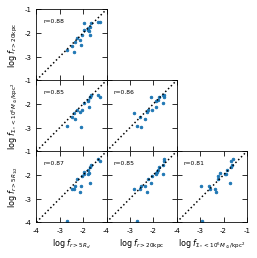

In [38]:
fig, ax = plt.subplots(3,3)
plt.subplots_adjust(hspace=0, wspace=0)



ax[0,0].scatter(all_frac_0[indices_01], all_frac_1[indices_01], s=6)
ax[0,0].plot([-4,-1], [-4,-1], "k:")
temp_result = pearsonr(all_frac_0[indices_01], all_frac_1[indices_01])
ax[0,0].annotate(f"r={temp_result[0]:.2f}", (-3.7, -1.55), size=6)

ax[1,0].scatter(all_frac_0[indices_02], all_frac_2[indices_02], s=6)
ax[1,0].plot([-4,-1], [-4,-1], "k:")
temp_result = pearsonr(all_frac_0[indices_02], all_frac_2[indices_02])
ax[1,0].annotate(f"r={temp_result[0]:.2f}", (-3.7, -1.55), size=6)

ax[1,1].scatter(all_frac_1[indices_12], all_frac_2[indices_12], s=6)
ax[1,1].plot([-4,-1], [-4,-1], "k:")
temp_result = pearsonr(all_frac_1[indices_12], all_frac_2[indices_12])
ax[1,1].annotate(f"r={temp_result[0]:.2f}", (-3.7, -1.55), size=6)

ax[2,0].scatter(all_frac_0[indices_03], all_frac_3[indices_03], s=6)
ax[2,0].plot([-4,-1], [-4,-1], "k:")
temp_result = pearsonr(all_frac_0[indices_03], all_frac_3[indices_03])
ax[2,0].annotate(f"r={temp_result[0]:.2f}", (-3.7, -1.55), size=6)

ax[2,1].scatter(all_frac_1[indices_13], all_frac_3[indices_13], s=6)
ax[2,1].plot([-4,-1], [-4,-1], "k:")
temp_result = pearsonr(all_frac_1[indices_13], all_frac_3[indices_13])
ax[2,1].annotate(f"r={temp_result[0]:.2f}", (-3.7, -1.55), size=6)

ax[2,2].scatter(all_frac_2[indices_23], all_frac_3[indices_23], s=6)
ax[2,2].plot([-4,-1], [-4,-1], "k:")
temp_result = pearsonr(all_frac_2[indices_23], all_frac_3[indices_23])
ax[2,2].annotate(f"r={temp_result[0]:.2f}", (-3.7, -1.55), size=6)

for a in ax.flatten():
    
    a.set_ylim([-4,-1])
    a.set_xlim([-4,-1])
    
    a.set_xticks([-4, -3,  -2,  -1])
    a.set_xticklabels(["-4","-3", "-2", ""])
    
    a.set_yticks([-4, -3,  -2,  -1])
    a.set_yticklabels(["",  "-3",  "-2", "-1"])
    
    a.yaxis.set_tick_params(which='major',size=5,pad=5, right=True, direction="in")
    a.xaxis.set_tick_params(which='major',size=5,pad=5, top=True, direction="in")
    a.tick_params(labelsize=7)
    
ax[0,1].axis('off')
ax[0,2].axis('off')
ax[1,2].axis('off')

ax[0,0].set_xticklabels([])
ax[1,0].set_xticklabels([])
ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])
ax[2,1].set_yticklabels([])
ax[2,2].set_yticklabels([])

ax[2,2].set_xticklabels(["-4",  "-3", "-2",  "-1"])
ax[2,0].set_yticklabels(["-4",  "-3",  "-2",  "-1"])

ax[0,0].set_ylabel(r"log $f_{r > 20\mathrm{kpc}}$", size=8)
ax[1,0].set_ylabel(r"log $f_{\Sigma_* < 10^6 M_\odot/\mathrm{kpc}^2}$", size=8)
ax[2,0].set_ylabel(r"log $f_{r > 5R_{1/2}}$", size=8)

ax[2,0].set_xlabel(r"log $f_{r > 5R_d}}$", size=8)
ax[2,1].set_xlabel(r"log $f_{r > 20\mathrm{kpc}}$", size=8)
ax[2,2].set_xlabel(r"log $f_{\Sigma_* < 10^6 M_\odot/\mathrm{kpc}^2}$", size=8)
    
fig.set_size_inches(3.4, 3.4)
plt.subplots_adjust(left=0.12, right=0.98, top=0.98, bottom=0.11)
plt.savefig(f"stellar_halo_fraction_cornerplot_small.pdf", dpi=300)
plt.show()

### Repeat correlation tests for outer mass fraction (rather than stellar halo mass fraction)

In [39]:
all_outer_0 = np.array(list(outer_frac_S4G[0]) + list(DNGS_outer_frac_S4G[0]))
all_outer_1 = np.array(list(outer_frac_S4G[1]) + list(DNGS_outer_frac_S4G[1]))
all_outer_2 = np.array(list(outer_frac_S4G[2]) + list(DNGS_outer_frac_S4G[2]))
all_outer_3 = np.array(list(outer_frac_S4G[3]) + list(DNGS_outer_frac_S4G[3]))

indices_outer_0 = [i for i, (mass, frac) in enumerate(zip(all_masses, all_outer_0)) if not np.isnan(frac)]
indices_outer_1 = [i for i, (mass, frac) in enumerate(zip(all_masses, all_outer_1)) if not np.isnan(frac)]
indices_outer_2 = [i for i, (mass, frac) in enumerate(zip(all_masses, all_outer_2)) if not np.isnan(frac)]
indices_outer_3 = [i for i, (mass, frac) in enumerate(zip(all_masses, all_outer_3)) if not np.isnan(frac)]

In [40]:
print(pearsonr(all_masses[indices_outer_0], all_outer_0[indices_outer_0]))
print(spearmanr(all_masses[indices_outer_0], all_outer_0[indices_outer_0]))

(0.22740173161586374, 0.3349446759912337)
SpearmanrResult(correlation=0.19631441779431572, pvalue=0.4068034873176819)


In [41]:
print(pearsonr(all_masses[indices_outer_1], all_outer_1[indices_outer_1]))
print(spearmanr(all_masses[indices_outer_1], all_outer_1[indices_outer_1]))

(0.4809032363106099, 0.0318329115574206)
SpearmanrResult(correlation=0.49116212574593154, pvalue=0.027865642639012093)


In [42]:
print(pearsonr(all_masses[indices_outer_2], all_outer_2[indices_outer_2]))
print(spearmanr(all_masses[indices_outer_2], all_outer_2[indices_outer_2]))

(-0.3016690469287571, 0.1961489660765938)
SpearmanrResult(correlation=-0.3053779832356022, pvalue=0.1904341615157756)


In [43]:
print(pearsonr(all_masses[indices_outer_3], all_outer_3[indices_outer_3]))
print(spearmanr(all_masses[indices_outer_3], all_outer_3[indices_outer_3]))

(0.595416200114753, 0.005608732967323569)
SpearmanrResult(correlation=0.6393381422420243, pvalue=0.002404569716352945)


## Comparison with simulations

In [44]:
import pandas as pd

elias18_data = pd.read_csv('elias18_figure5.csv', header=0)
elias18_lower = pd.read_csv('elias18_figure5_lower.csv', header=0)

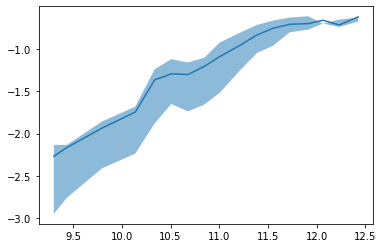

In [45]:
plt.plot(elias18_data['# Mass'], elias18_data['median'])
plt.fill_between(elias18_data['# Mass'], elias18_data['lower'], elias18_data['upper'], alpha=0.5)

In [46]:
merritt20_data = pd.read_csv('merritt20_TNG_masses.csv', header=0)

In [47]:
merritt20_data[0:20]

,Unnamed: 0,subfindID,integrated_mstell,integrated_mstell_outer5Re,integrated_mstell_outer2Re,integrated_mstell_outer30kpc,integrated_mstell_outer20kpc,integrated_mstell_density6,rhalf2D,f_acc
0,0,369366,7.469684e+10,1.657749e+09,1.957282e+10,5.401091e+09,1.957282e+10,2.657690e+09,10.025087,0.309777
1,1,376544,8.948201e+10,6.017827e+09,2.809612e+10,1.081099e+10,2.278603e+10,3.713892e+09,8.282923,0.263620
2,2,383118,3.281753e+10,2.295942e+09,9.228925e+09,7.902832e+08,1.671413e+09,1.072416e+09,3.194447,0.098050
3,3,385350,8.452969e+10,8.417808e+09,3.191390e+10,2.078190e+10,3.191390e+10,2.793946e+09,10.018853,0.417837
4,4,387936,8.350250e+10,1.632629e+10,3.432978e+10,9.557467e+09,2.086673e+10,3.417356e+09,4.674115,0.230563
5,5,389511,5.735582e+10,5.155332e+09,1.907194e+10,2.330657e+09,6.522558e+09,2.728033e+09,4.250590,0.213838
6,6,392368,9.445796e+10,4.370721e+09,3.085475e+10,5.553390e+09,1.755541e+10,3.472040e+09,6.845284,0.205170
7,7,393336,5.639623e+10,3.407039e+09,1.820664e+10,3.407039e+09,9.880821e+09,1.694481e+09,6.223925,0.171620
8,8,400547,6.866752e+10,4.847618e+09,2.117863e+10,4.847618e+09,1.027662e+10,1.945448e+09,6.223672,0.279002
9,9,402017,9.628116e+10,7.200207e+09,2.925619e+10,8.080057e+09,1.656360e+10,7.200207e+09,6.844658,0.178898


In [48]:
merritt20_data["fhalo_5Re"] = merritt20_data["integrated_mstell_outer5Re"] / merritt20_data["integrated_mstell"]
merritt20_data["fhalo_20kpc"] = merritt20_data["integrated_mstell_outer20kpc"] / merritt20_data["integrated_mstell"]
merritt20_data["fhalo_6"] = merritt20_data["integrated_mstell_density6"] / merritt20_data["integrated_mstell"]


/home/cgilhuly/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


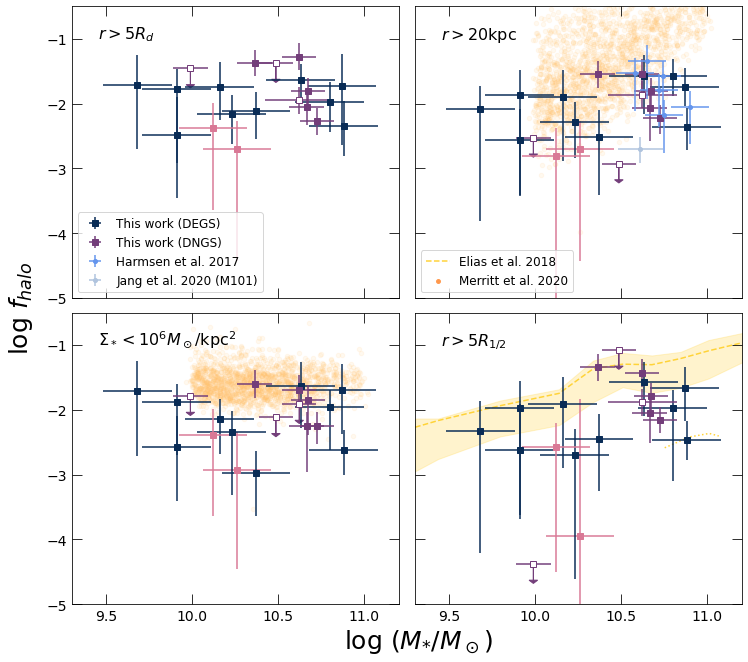

In [51]:
fig, ax = plt.subplots(2,2)
plt.subplots_adjust(hspace=0.05, wspace=0.05)

gals_noHalo = ["NGC1042", "NGC3351", "M101"]
gals_trickyFields = ["NGC3044", "NGC4634"]  #NGC4437


for i, axis in enumerate(ax.flatten()):
    
    axis.annotate(halo_defs[i], (9.45, -1), size=16)
    
    #for j in range(4):
    #    if j != i:
    #        axis.scatter(masses_S4G, halo_frac_S4G[j], color="#092c56", s=5)
    
    for k in range(len(galaxies)):
        if galaxies[k] in gals_noHalo:
            axis.errorbar(masses_S4G[k], halo_frac_S4G[i][k], xerr=0.20, yerr=[[err_halo_frac_S4G_lower[i,k]],[err_halo_frac_S4G_upper[i,k]]], fmt='s', color='#092c56', mfc='white')
            
        elif galaxies[k] in gals_trickyFields:
            axis.errorbar(masses_S4G[k], halo_frac_S4G[i][k], xerr=0.20, yerr=[[err_halo_frac_S4G_lower[i,k]],[err_halo_frac_S4G_upper[i,k]]], fmt='s', color='#d97996')
            
        else:
            axis.errorbar(masses_S4G[k], halo_frac_S4G[i][k], xerr=0.20, yerr=[[err_halo_frac_S4G_lower[i,k]],[err_halo_frac_S4G_upper[i,k]]], fmt='s', color='#092c56')
       
    # DNGS (Merritt+2016)
    #for j in range(4):
    #    if j != i:
    #        axis.scatter(DNGS_masses_S4G, DNGS_halo_frac_S4G[j], color="#733e7a", s=5)

    for k in range(len(DNGS_galaxies)):
        if DNGS_galaxies[k] in gals_noHalo:
            axis.errorbar(DNGS_masses_S4G[k], DNGS_halo_frac_S4G[i][k], xerr=0.20, yerr=[[DNGS_err_halo_frac_S4G_lower[i,k]],[DNGS_err_halo_frac_S4G_upper[i,k]]], fmt='s', color='#733e7a', mfc='white')

            if not np.isfinite(DNGS_halo_frac_S4G[i][k]):
                axis.errorbar(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], xerr=0.10, fmt='s', color='#733e7a', mfc='white')
                axis.arrow(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], 0, -0.25, head_length=0.05, head_width=0.05, color='#733e7a')

        elif DNGS_galaxies[k] in gals_trickyFields:
            axis.errorbar(DNGS_masses_S4G[k], DNGS_halo_frac_S4G[i][k], xerr=0.20, yerr=[[DNGS_err_halo_frac_S4G_lower[i,k]],[DNGS_err_halo_frac_S4G_upper[i,k]]], fmt='s', color='#d97996')

            if not np.isfinite(DNGS_halo_frac_S4G[i][k]):
                axis.errorbar(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], xerr=0.20, fmt='s', color='#d97996')
                axis.arrow(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], 0, -0.25, head_length=0.05, head_width=0.05, color='#d97996')

        else:
            axis.errorbar(DNGS_masses_S4G[k], DNGS_halo_frac_S4G[i][k], xerr=0.10, yerr=[[DNGS_err_halo_frac_S4G_lower[i,k]],[DNGS_err_halo_frac_S4G_upper[i,k]]], fmt='s', color='#733e7a')  

            if not np.isfinite(DNGS_halo_frac_S4G[i][k]):
                axis.errorbar(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], xerr=0.20, fmt='s', color='#733e7a')
                axis.arrow(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], 0, -0.25, head_length=0.05, head_width=0.05, color='#733e7a')
     

    # Plotting additional obs/simulations matching each definition of stellar halo dominated region
        
    if i == 1:
        # Illustris TNG (Merritt+2020)
        axis.scatter(np.log10(merritt20_data["integrated_mstell"]), np.log10(merritt20_data["fhalo_20kpc"]), s=20, color="#ffc56b", alpha=0.1)
        
        # GHOSTS (Harmsen+2017)
        axis.errorbar(GHOSTS_masses, GHOSTS_halo_frac, xerr=GHOSTS_err_masses, yerr=lin_GHOSTS_err_halo_frac_sys, fmt='o', markersize=4, color='cornflowerblue') # label="Harmsen et al. 2017"
        
        # M101 (Dragonfly + HST; Jang+2020)
        # Exponential disc + fixed slope power law halo; halo integrated from 40-70 kpc
        # Doesn't really line up with any 
        axis.errorbar(M101_masses, M101_halo_frac, xerr=M101_err_masses, yerr=lin_M101_err_halo_frac, fmt='o', markersize=4, color='lightsteelblue') # label="Jang et al. 2020 (M101)"


    if i == 2:
        # Illustris TNG (Merritt+2020)
        axis.scatter(np.log10(merritt20_data["integrated_mstell"]), np.log10(merritt20_data["fhalo_6"]), s=20, color="#ffc56b", alpha=0.1)
        
    if i == 3:
        # Illustris (Elias+2018)
        axis.plot(elias18_data['# Mass'], elias18_data['median'], '--', color="#ffd338", zorder=0)
        axis.fill_between(elias18_data['# Mass'], elias18_data['lower'], elias18_data['upper'], color='#ffd338', alpha=0.25) # label="Elias et al. (2018)"
        axis.plot(elias18_lower["X"], elias18_lower["Y"], ':', color="#ffd338", zorder=0)
    
    # Legends
    if i == 0:
        # Legend for observations
        axis.errorbar([0],[0], xerr=0.10, yerr=0.10, fmt='s', color='#092c56', label="This work (DEGS)")
        axis.errorbar([0],[0], xerr=0.10, yerr=0.10, fmt='s', color='#733e7a', label="This work (DNGS)")
        axis.errorbar([0],[0], xerr=0.10, yerr=0.10, fmt='o', markersize=4, color='cornflowerblue', label="Harmsen et al. 2017")
        axis.errorbar([0],[0], xerr=0.10, yerr=0.10, fmt='o', markersize=4, color='lightsteelblue', label="Jang et al. 2020 (M101)")
        
        axis.legend(loc=3, fontsize=12)
        
    if i == 1:
        # Legend for simulations
        axis.scatter([5],[5], label="Merritt et al. 2020", s=15, color="#ff984b")
        axis.plot([5],[5], '--', color='#ffd338', label="Elias et al. 2018")
        axis.legend(loc=3, fontsize=12)       
    
    
    axis.set_xlim(9.3,11.2)
    axis.set_xticks([9.5, 10, 10.5, 11])
    
    axis.set_ylim(-5, -0.5)
    axis.set_yticks([-5., -4., -3., -2., -1.])
    
    axis.yaxis.set_tick_params(which='major',size=10,pad=5, right=True, direction="in")
    axis.xaxis.set_tick_params(which='major',size=10,pad=5, top=True, direction="in")
    axis.tick_params(labelsize=14)

ax[0,0].set_xticklabels([])
ax[0,1].set_yticklabels([])
ax[0,1].set_xticklabels([])
ax[1,1].set_yticklabels([])

#ax[1,0].set_xticklabels(["9.0", "9.5", "10.0", "10.5", ""])

fig.text(0.44, 0.07, "log $(M_{*}/M_\odot)$", size=25)
fig.text(0.05, 0.45, r"log $f_{halo}$", size=25, rotation=90)

fig.set_size_inches(12,11)

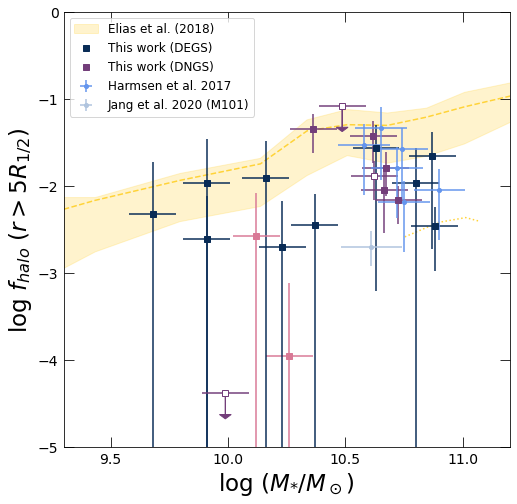

In [69]:
fig, axis = plt.subplots()

gals_noHalo = ["NGC1042", "NGC3351", "M101"]
gals_trickyFields = ["NGC3044", "NGC4634"]  #NGC4437

i = 3
   
for k in range(len(galaxies)):
    if galaxies[k] in gals_noHalo:
        axis.errorbar(masses_S4G[k], halo_frac_S4G[i][k], xerr=0.10, yerr=lin_err_halo_frac_S4G[i,:,k].reshape(2,1), fmt='s', color='#092c56', mfc='white')
                    
    elif galaxies[k] in gals_trickyFields:
        axis.errorbar(masses_S4G[k], halo_frac_S4G[i][k], xerr=0.10, yerr=lin_err_halo_frac_S4G[i,:,k].reshape(2,1), fmt='s', color='#d97996')
                    
    else:
        axis.errorbar(masses_S4G[k], halo_frac_S4G[i][k], xerr=0.10, yerr=lin_err_halo_frac_S4G[i,:,k].reshape(2,1), fmt='s', color='#092c56')
            
# Dud points for legend
axis.errorbar(0, 0, fmt='s', color='#092c56', label="This work (DEGS)")
    
for k in range(len(DNGS_galaxies)):
    if DNGS_galaxies[k] in gals_noHalo:
        axis.errorbar(DNGS_masses_S4G[k], DNGS_halo_frac_S4G[i][k], xerr=0.10, yerr=lin_DNGS_err_halo_frac_S4G[i,:,k].reshape(2,1), fmt='s', color='#733e7a', mfc='white')

        if not np.isfinite(DNGS_halo_frac_S4G[i][k]):
            axis.errorbar(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], xerr=0.10, fmt='s', color='#733e7a', mfc='white')
            axis.arrow(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], 0, -0.25, head_length=0.05, head_width=0.05, color='#733e7a')

    elif DNGS_galaxies[k] in gals_trickyFields:
        axis.errorbar(DNGS_masses_S4G[k], DNGS_halo_frac_S4G[i][k], xerr=0.10, yerr=lin_DNGS_err_halo_frac_S4G[i,:,k].reshape(2,1), fmt='s', color='#cd5176')

        if not np.isfinite(DNGS_halo_frac_S4G[i][k]):
            axis.errorbar(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], xerr=0.10, fmt='s', color='#cd5176')
            axis.arrow(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], 0, -0.25, head_length=0.05, head_width=0.05, color='#cd5176')

    else:
        axis.errorbar(DNGS_masses_S4G[k], DNGS_halo_frac_S4G[i][k], xerr=0.10, yerr=lin_DNGS_err_halo_frac_S4G[i,:,k].reshape(2,1), fmt='s', color='#733e7a')  

        if not np.isfinite(DNGS_halo_frac_S4G[i][k]):
            axis.errorbar(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], xerr=0.10, fmt='s', color='#733e7a')
            axis.arrow(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], 0, -0.25, head_length=0.05, head_width=0.05, color='#733e7a')

# Dud points for legend
axis.errorbar(0, 0, fmt='s', color='#733e7a', label="This work (DNGS)")
    
# GHOSTS (Harmsen+2017)
axis.errorbar(GHOSTS_masses, GHOSTS_halo_frac, xerr=GHOSTS_err_masses, yerr=lin_GHOSTS_err_halo_frac_sys, fmt='o', markersize=4, color='cornflowerblue', label="Harmsen et al. 2017")
 
# M101 (Dragonfly + HST; Jang+2020)
axis.errorbar(M101_masses, M101_halo_frac, xerr=M101_err_masses, yerr=lin_M101_err_halo_frac, fmt='o', markersize=4, color='lightsteelblue', label="Jang et al. 2020 (M101)")

# Illustris mass fraction beyond 5 R_1/2 (Elias+2018)
plt.plot(elias18_data['# Mass'], elias18_data['median'], '--', color="#ffd338", zorder=0)
plt.fill_between(elias18_data['# Mass'], elias18_data['lower'], elias18_data['upper'], color='#ffd338', alpha=0.25, label="Elias et al. (2018)")
plt.plot(elias18_lower["X"], elias18_lower["Y"], ':', color="#ffd338", zorder=0)

# TNG
#plt.scatter(np.log10(merritt20_data["integrated_mstell"]), np.log10(merritt20_data["fhalo_5Re"]), label="Merritt et al. 2020", s=12, color="#ff8554", alpha=0.1)

axis.legend(loc=2, fontsize=12)
    
axis.set_xlim(9.3,11.2)
axis.set_xticks([9.5, 10, 10.5, 11])
    
axis.set_ylim(-5, 0)
axis.set_yticks([-5., -4., -3., -2., -1., 0])
    
axis.yaxis.set_tick_params(which='major',size=10,pad=5, right=True, direction="in")
axis.xaxis.set_tick_params(which='major',size=10,pad=5, top=True, direction="in")
axis.tick_params(labelsize=14)

axis.set_xlabel("log $(M_{*}/M_\odot)$", size=23)
axis.set_ylabel("log $f_{halo}$ $(r>5R_{1/2})$", size=23)

fig.set_size_inches(8,8)

## Versions without subtracting disc contribution

/home/cgilhuly/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


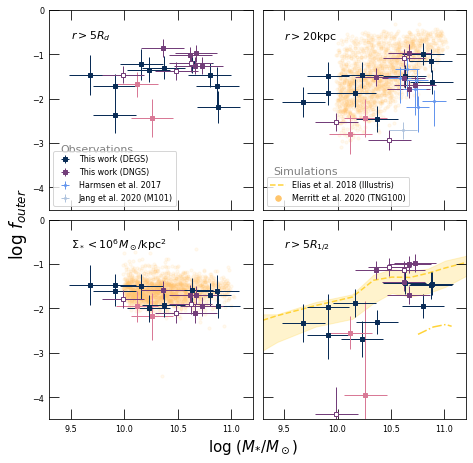

In [52]:
fig, ax = plt.subplots(2,2)
plt.subplots_adjust(hspace=0.05, wspace=0.05)

gals_noHalo = ["NGC1042", "NGC3351", "M101"]
gals_trickyFields = ["NGC3044", "NGC4634"]  #NGC4437


for i, axis in enumerate(ax.flatten()):
    
    axis.annotate(halo_defs[i], (9.5, -0.65), size=11)
    
    #for j in range(4):
    #    if j != i:
    #        axis.scatter(masses_S4G, outer_frac_S4G[j], color="#092c56", s=2)
    
    for k in range(len(galaxies)):
        if galaxies[k] in gals_noHalo:
            axis.errorbar(masses_S4G[k], outer_frac_S4G[i][k], xerr=0.20, yerr=err_outer_frac_S4G[i,k], fmt='s', ms=4, color='#092c56', mfc='white', elinewidth=1)
            
        elif galaxies[k] in gals_trickyFields:
            axis.errorbar(masses_S4G[k], outer_frac_S4G[i][k], xerr=0.20, yerr=err_outer_frac_S4G[i,k], fmt='s', ms=4, color='#d97996', elinewidth=1)
            
        else:
            axis.errorbar(masses_S4G[k], outer_frac_S4G[i][k], xerr=0.20, yerr=err_outer_frac_S4G[i,k], fmt='s', ms=4, color='#092c56', elinewidth=1)
       
    # DNGS (Merritt+2016)
    #for j in range(4):
    #    if j != i:
    #        axis.scatter(DNGS_masses_S4G, DNGS_outer_frac_S4G[j], color="#733e7a", s=2)

    for k in range(len(DNGS_galaxies)):
        if DNGS_galaxies[k] in gals_noHalo:
            axis.errorbar(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], xerr=0.20, yerr=DNGS_err_outer_frac_S4G[i,k], fmt='s', ms=4,  color='#733e7a', mfc='white', elinewidth=1)

        elif DNGS_galaxies[k] in gals_trickyFields:
            axis.errorbar(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], xerr=0.20, yerr=DNGS_err_outer_frac_S4G[i,k], fmt='s', ms=4, color='#cd5176', elinewidth=1)

        else:
            axis.errorbar(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], xerr=0.20, yerr=DNGS_err_outer_frac_S4G[i,k], fmt='s', ms=4, color='#733e7a', elinewidth=1)
     

    # Plotting additional obs/simulations matching each definition of stellar halo dominated region
        
    if i == 1:
        # Illustris TNG (Merritt+2020)
        axis.scatter(np.log10(merritt20_data["integrated_mstell"]), np.log10(merritt20_data["fhalo_20kpc"]), s=10, color="#ffc56b", alpha=0.1)
        
        # GHOSTS (Harmsen+2017)
        axis.errorbar(GHOSTS_masses, GHOSTS_halo_frac, xerr=GHOSTS_err_masses, yerr=lin_GHOSTS_err_halo_frac_sys, fmt='o', ms=2, elinewidth=1, color='cornflowerblue') # label="Harmsen et al. 2017"
        
        # M101 (Dragonfly + HST; Jang+2020)
        # Exponential disc + fixed slope power law halo; halo integrated from 40-70 kpc
        # Doesn't really line up with any 
        axis.errorbar(M101_masses, M101_halo_frac, xerr=M101_err_masses, yerr=lin_M101_err_halo_frac, fmt='o', ms=2, elinewidth=1, color='lightsteelblue') # label="Jang et al. 2020 (M101)"


    if i == 2:
        # Illustris TNG (Merritt+2020)
        axis.scatter(np.log10(merritt20_data["integrated_mstell"]), np.log10(merritt20_data["fhalo_6"]), s=10, color="#ffc56b", alpha=0.1)
        
    if i == 3:
        # Illustris (Elias+2018)
        axis.plot(elias18_data['# Mass'], elias18_data['median'], '--', color="#ffd338", zorder=0)
        axis.fill_between(elias18_data['# Mass'], elias18_data['lower'], elias18_data['upper'], color='#ffd338', alpha=0.25) # label="Elias et al. (2018)"
        axis.plot(elias18_lower["X"], elias18_lower["Y"], '-.', color="#ffd338", zorder=0)
    
    # Legends
    if i == 0:
        # Legend for observations
        axis.errorbar([0],[0], xerr=0.10, yerr=0.10, fmt='s', ms=4, color='#092c56', label="This work (DEGS)", elinewidth=1)
        axis.errorbar([0],[0], xerr=0.10, yerr=0.10, fmt='s', ms=4, color='#733e7a', label="This work (DNGS)", elinewidth=1)
        axis.errorbar([0],[0], xerr=0.10, yerr=0.10, fmt='o', ms=2, elinewidth=1, color='cornflowerblue', label="Harmsen et al. 2017")
        axis.errorbar([0],[0], xerr=0.10, yerr=0.10, fmt='o', ms=2, elinewidth=1, color='lightsteelblue', label="Jang et al. 2020 (M101)")
        
        axis.legend(loc=3, fontsize=8)
        axis.annotate("Observations", (9.4, -3.2), size=11, color="grey")
        
    if i == 1:
        # Legend for simulations
        axis.plot([5],[5], '--', color='#ffd338', label="Elias et al. 2018 (Illustris)")
        axis.scatter([5],[5], label="Merritt et al. 2020 (TNG100)", s=30, color="#ffc56b")
        axis.legend(loc=3, fontsize=8)  
        axis.annotate("Simulations", (9.4, -3.7), size=11, color="grey")
    
    
    axis.set_xlim(9.3,11.2)
    axis.set_xticks([9.5, 10, 10.5, 11])
    
    axis.set_ylim(-4.5, 0)
    axis.set_yticks([ -4., -3., -2., -1., 0])
    
    axis.yaxis.set_tick_params(which='major',size=10,pad=5, right=True, direction="in")
    axis.xaxis.set_tick_params(which='major',size=10,pad=5, top=True, direction="in")
    axis.tick_params(labelsize=8)

ax[0,0].set_xticklabels([])
ax[0,1].set_yticklabels([])
ax[0,1].set_xticklabels([])
ax[1,1].set_yticklabels([])

#ax[1,0].set_xticklabels(["9.0", "9.5", "10.0", "10.5", ""])


fig.text(0.44, 0.01, "log $(M_{*}/M_\odot)$", size=15)
fig.text(0.01, 0.45, r"log $f_{outer}$", size=17, rotation=90)

fig.set_size_inches(6.5, 6.25)
plt.subplots_adjust(left=0.1, right=0.99, top=0.99, bottom=0.08)
plt.savefig(f"outer_mass_fraction_vs_mass_small.pdf", dpi=300)

In [71]:
np.mean(np.ma.log10(np.array(merritt20_data["fhalo_6"]))) - np.mean(np.concatenate((outer_frac_S4G[2], DNGS_outer_frac_S4G[2])))

0.19722069504276196

In [72]:
np.mean(np.ma.log10(np.array(merritt20_data["fhalo_20kpc"]))) - np.mean(np.concatenate((outer_frac_S4G[1], DNGS_outer_frac_S4G[1])))

0.3295868760317162

## Extra: quick comparison with D'Souza+14 

In [39]:
dsouza14_data = pd.read_csv('dsouza14_figure17.csv', header=0)

In [40]:
dsouza14_data

,M_star,f_outer,err_upper,err,log_f,err_log_f,err_upper.1,err_lower
0,10.1,0.023333,0.047895,0.024561,-1.632023,0.457152,0.312311,8.888000
1,10.3,0.026491,0.051404,0.024912,-1.576898,0.408409,0.287891,1.224734
2,10.5,0.033860,0.058772,0.024912,-1.470318,0.319533,0.239487,0.577987
3,10.7,0.093509,0.113158,0.019649,-1.029148,0.091259,0.082833,0.102445
4,10.9,0.178421,0.193158,0.014737,-0.748554,0.035871,0.034466,0.037439
5,11.2,0.233509,0.248947,0.015439,-0.631697,0.028714,0.027804,0.029707


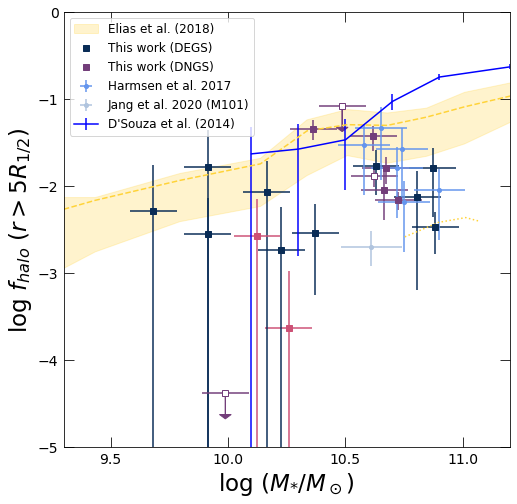

In [41]:
fig, axis = plt.subplots()

gals_noHalo = ["NGC1042", "NGC3351", "M101"]
gals_trickyFields = ["NGC3044", "NGC4634"]  #NGC4437

i = 3
   
for k in range(len(galaxies)):
    if galaxies[k] in gals_noHalo:
        axis.errorbar(masses_S4G[k], halo_frac_S4G[i][k], xerr=0.10, yerr=lin_err_halo_frac_S4G[i,:,k].reshape(2,1), fmt='s', color='#092c56', mfc='white')
                    
    elif galaxies[k] in gals_trickyFields:
        axis.errorbar(masses_S4G[k], halo_frac_S4G[i][k], xerr=0.10, yerr=lin_err_halo_frac_S4G[i,:,k].reshape(2,1), fmt='s', color='#cd5176')
                    
    else:
        axis.errorbar(masses_S4G[k], halo_frac_S4G[i][k], xerr=0.10, yerr=lin_err_halo_frac_S4G[i,:,k].reshape(2,1), fmt='s', color='#092c56')
            
# Dud points for legend
axis.errorbar(0, 0, fmt='s', color='#092c56', label="This work (DEGS)")
    
for k in range(len(DNGS_galaxies)):
    if DNGS_galaxies[k] in gals_noHalo:
        axis.errorbar(DNGS_masses_S4G[k], DNGS_halo_frac_S4G[i][k], xerr=0.10, yerr=lin_DNGS_err_halo_frac_S4G[i,:,k].reshape(2,1), fmt='s', color='#733e7a', mfc='white')

        if not np.isfinite(DNGS_halo_frac_S4G[i][k]):
            axis.errorbar(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], xerr=0.10, fmt='s', color='#733e7a', mfc='white')
            axis.arrow(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], 0, -0.25, head_length=0.05, head_width=0.05, color='#733e7a')

    elif DNGS_galaxies[k] in gals_trickyFields:
        axis.errorbar(DNGS_masses_S4G[k], DNGS_halo_frac_S4G[i][k], xerr=0.10, yerr=lin_DNGS_err_halo_frac_S4G[i,:,k].reshape(2,1), fmt='s', color='#cd5176')

        if not np.isfinite(DNGS_halo_frac_S4G[i][k]):
            axis.errorbar(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], xerr=0.10, fmt='s', color='#cd5176')
            axis.arrow(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], 0, -0.25, head_length=0.05, head_width=0.05, color='#cd5176')

    else:
        axis.errorbar(DNGS_masses_S4G[k], DNGS_halo_frac_S4G[i][k], xerr=0.10, yerr=lin_DNGS_err_halo_frac_S4G[i,:,k].reshape(2,1), fmt='s', color='#733e7a')  

        if not np.isfinite(DNGS_halo_frac_S4G[i][k]):
            axis.errorbar(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], xerr=0.10, fmt='s', color='#733e7a')
            axis.arrow(DNGS_masses_S4G[k], DNGS_outer_frac_S4G[i][k], 0, -0.25, head_length=0.05, head_width=0.05, color='#733e7a')

# Dud points for legend
axis.errorbar(0, 0, fmt='s', color='#733e7a', label="This work (DNGS)")
    
# GHOSTS (Harmsen+2017)
axis.errorbar(GHOSTS_masses, GHOSTS_halo_frac, xerr=GHOSTS_err_masses, yerr=lin_GHOSTS_err_halo_frac_sys, fmt='o', markersize=4, color='cornflowerblue', label="Harmsen et al. 2017")
 
# M101 (Dragonfly + HST; Jang+2020)
axis.errorbar(M101_masses, M101_halo_frac, xerr=M101_err_masses, yerr=lin_M101_err_halo_frac, fmt='o', markersize=4, color='lightsteelblue', label="Jang et al. 2020 (M101)")

# Illustris mass fraction beyond 5 R_1/2 (Elias+2018)
plt.plot(elias18_data['# Mass'], elias18_data['median'], '--', color="#ffd338")
plt.fill_between(elias18_data['# Mass'], elias18_data['lower'], elias18_data['upper'], color='#ffd338', alpha=0.25, label="Elias et al. (2018)")
plt.plot(elias18_lower["X"], elias18_lower["Y"], ':', color="#ffd338")

plt.errorbar(dsouza14_data['M_star'], dsouza14_data['log_f'], yerr=[dsouza14_data['err_lower'], dsouza14_data['err_upper.1']], color="blue", label="D'Souza et al. (2014)")

axis.legend(loc=2, fontsize=12)
    
axis.set_xlim(9.3,11.2)
axis.set_xticks([9.5, 10, 10.5, 11])
    
axis.set_ylim(-5, 0)
axis.set_yticks([-5., -4., -3., -2., -1., 0])
    
axis.yaxis.set_tick_params(which='major',size=10,pad=5, right=True, direction="in")
axis.xaxis.set_tick_params(which='major',size=10,pad=5, top=True, direction="in")
axis.tick_params(labelsize=14)

axis.set_xlabel("log $(M_{*}/M_\odot)$", size=23)
axis.set_ylabel("log $f_{halo}$ $(r>5R_{1/2})$", size=23)

fig.set_size_inches(8,8)

## Comparison with minor axis-derived values

In [3]:
# Reading masses and mass fractions from data files
# Error bars include random and systematic sources of error

halo_frac_minor = np.zeros((4,12))
err_halo_frac_minor = np.zeros((4,12))
halo_mass_minor = np.zeros((4,12))
err_halo_mass_minor = np.zeros((4,12))

for i, gal in enumerate(galaxies):
    
    massfile = f"../{gal}/{gal}-masses-fractions-minor.txt"
    f = open(massfile, 'r')
    lines = f.readlines()[2:]  # Skipping two header lines
    f.close()
    
    for j in range(0,4):
        temp_data = [float(x) for x in lines[j].split()]

        halo_mass_minor[j,i] = temp_data[2]
        err_halo_mass_minor[j,i] = temp_data[3]
        halo_frac_minor[j,i] = temp_data[4]
        err_halo_frac_minor[j,i] = temp_data[5]

Found a missing frac!
Found a missing frac!
Found a missing frac!
Found a missing frac!
Found a missing frac!
Found a missing frac!
Found a missing frac!
Found a missing frac!


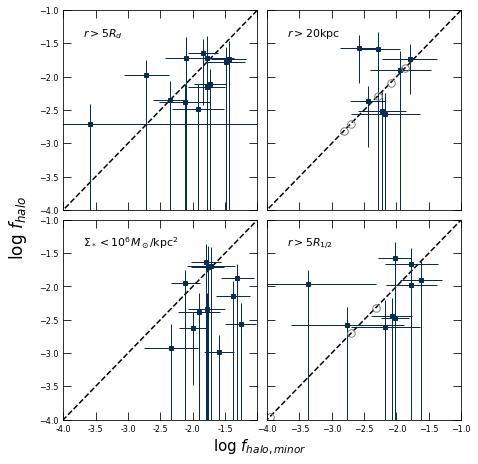

In [56]:
fig, ax = plt.subplots(2,2)
plt.subplots_adjust(hspace=0.05, wspace=0.05)

gals_noHalo = ["NGC1042", "NGC3351", "M101"]
gals_trickyFields = ["NGC3044", "NGC4634"]  #NGC4437


for i, axis in enumerate(ax.flatten()):
    
    axis.annotate(halo_defs[i], (-3.7, -1.4), size=11)
    
   
    for k in range(len(galaxies)):
        
        if np.isinf(halo_frac_minor[i][k]):
            print("Found a missing frac!")
            axis.errorbar(halo_frac_S4G[i][k],halo_frac_S4G[i][k],fmt='.', ms=15, mec="grey", color='none', lw=2)
            
        #elif galaxies[k] in gals_trickyFields:
        #    axis.errorbar(halo_frac_minor[i][k], halo_frac_S4G[i][k], xerr=err_halo_frac_minor[i][k], yerr=lin_err_halo_frac_S4G[i,:,k].reshape(2,1), fmt='s', ms=4, color='#d97996', elinewidth=1)           
            
        else:
            axis.errorbar(halo_frac_minor[i][k], halo_frac_S4G[i][k], xerr=err_halo_frac_minor[i][k], yerr=lin_err_halo_frac_S4G[i,:,k].reshape(2,1), fmt='s', ms=4, color='#092c56', elinewidth=1)
       
    axis.plot([0.5,-5],[0.5,-5],"k--",zorder=0)
    
    axis.set_xlim(-4, -1)
    axis.set_xticks([-4.,-3.5, -3.,-2.5, -2.,-1.5, -1.])
    
    axis.set_ylim(-4, -1)
    axis.set_yticks([-4.,-3.5, -3.,-2.5, -2.,-1.5, -1.])
    
    axis.yaxis.set_tick_params(which='major',size=8,pad=5, right=True, direction="in")
    axis.xaxis.set_tick_params(which='major',size=8,pad=5, top=True, direction="in")
    axis.tick_params(labelsize=8)

ax[0,0].set_xticklabels([])
ax[0,1].set_yticklabels([])
ax[0,1].set_xticklabels([])
ax[1,1].set_yticklabels([])

ax[1,0].set_xticklabels(["-4.0", "-3.5", "-3.0", "-2.5", "-2.0", "-1.5", ""])

fig.text(0.44, 0.01, r"log $f_{halo,minor}$", size=15)
fig.text(0.00, 0.45, r"log $f_{halo}$", size=17, rotation=90)

fig.set_size_inches(6.5, 6.25)
plt.subplots_adjust(left=0.12, right=0.97, top=0.99, bottom=0.08)
plt.savefig(f"azavg_vs_minor_halo_frac_small.pdf", dpi=300)
plt.show()

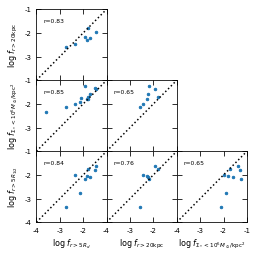

In [57]:
# Checking which fraction measurements are most strongly correlated with each other

indices_01 = [i for i, (frac1, frac2) in enumerate(zip(halo_frac_minor[0], halo_frac_minor[1])) if np.isfinite(frac1) and np.isfinite(frac2)]
indices_02 = [i for i, (frac1, frac2) in enumerate(zip(halo_frac_minor[0], halo_frac_minor[2])) if np.isfinite(frac1) and np.isfinite(frac2)]
indices_03 = [i for i, (frac1, frac2) in enumerate(zip(halo_frac_minor[0], halo_frac_minor[3])) if np.isfinite(frac1) and np.isfinite(frac2)]
indices_12 = [i for i, (frac1, frac2) in enumerate(zip(halo_frac_minor[1], halo_frac_minor[2])) if np.isfinite(frac1) and np.isfinite(frac2)]
indices_13 = [i for i, (frac1, frac2) in enumerate(zip(halo_frac_minor[1], halo_frac_minor[3])) if np.isfinite(frac1) and np.isfinite(frac2)]
indices_23 = [i for i, (frac1, frac2) in enumerate(zip(halo_frac_minor[2], halo_frac_minor[3])) if np.isfinite(frac1) and np.isfinite(frac2)]



fig, ax = plt.subplots(3,3)
plt.subplots_adjust(hspace=0, wspace=0)

ax[0,0].scatter(halo_frac_minor[0][indices_01], halo_frac_minor[1][indices_01], s=6)
ax[0,0].plot([-4,-1], [-4,-1], "k:")
temp_result = pearsonr(halo_frac_minor[0][indices_01], halo_frac_minor[1][indices_01])
ax[0,0].annotate(f"r={temp_result[0]:.2f}", (-3.7, -1.55), size=6)

ax[1,0].scatter(halo_frac_minor[0][indices_02], halo_frac_minor[2][indices_02], s=6)
ax[1,0].plot([-4,-1], [-4,-1], "k:")
temp_result = pearsonr(halo_frac_minor[0][indices_02], halo_frac_minor[2][indices_02])
ax[1,0].annotate(f"r={temp_result[0]:.2f}", (-3.7, -1.55), size=6)

ax[1,1].scatter(halo_frac_minor[1][indices_12], halo_frac_minor[2][indices_12], s=6)
ax[1,1].plot([-4,-1], [-4,-1], "k:")
temp_result = pearsonr(halo_frac_minor[1][indices_12], halo_frac_minor[2][indices_12])
ax[1,1].annotate(f"r={temp_result[0]:.2f}", (-3.7, -1.55), size=6)

ax[2,0].scatter(halo_frac_minor[0][indices_03], halo_frac_minor[3][indices_03], s=6)
ax[2,0].plot([-4,-1], [-4,-1], "k:")
temp_result = pearsonr(halo_frac_minor[0][indices_03], halo_frac_minor[3][indices_03])
ax[2,0].annotate(f"r={temp_result[0]:.2f}", (-3.7, -1.55), size=6)

ax[2,1].scatter(halo_frac_minor[1][indices_13], halo_frac_minor[3][indices_13], s=6)
ax[2,1].plot([-4,-1], [-4,-1], "k:")
temp_result = pearsonr(halo_frac_minor[1][indices_13], halo_frac_minor[3][indices_13])
ax[2,1].annotate(f"r={temp_result[0]:.2f}", (-3.7, -1.55), size=6)

ax[2,2].scatter(halo_frac_minor[2][indices_23], halo_frac_minor[3][indices_23], s=6)
ax[2,2].plot([-4,-1], [-4,-1], "k:")
temp_result = pearsonr(halo_frac_minor[2][indices_23], halo_frac_minor[3][indices_23])
ax[2,2].annotate(f"r={temp_result[0]:.2f}", (-3.7, -1.55), size=6)

for a in ax.flatten():
    
    a.set_ylim([-4,-1])
    a.set_xlim([-4,-1])
    
    a.set_xticks([-4, -3,  -2,  -1])
    a.set_xticklabels(["-4","-3", "-2", ""])
    
    a.set_yticks([-4, -3,  -2,  -1])
    a.set_yticklabels(["",  "-3",  "-2", "-1"])
    
    a.yaxis.set_tick_params(which='major',size=5,pad=5, right=True, direction="in")
    a.xaxis.set_tick_params(which='major',size=5,pad=5, top=True, direction="in")
    a.tick_params(labelsize=7)
    
ax[0,1].axis('off')
ax[0,2].axis('off')
ax[1,2].axis('off')

ax[0,0].set_xticklabels([])
ax[1,0].set_xticklabels([])
ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])
ax[2,1].set_yticklabels([])
ax[2,2].set_yticklabels([])

ax[2,2].set_xticklabels(["-4",  "-3", "-2",  "-1"])
ax[2,0].set_yticklabels(["-4",  "-3",  "-2",  "-1"])

ax[0,0].set_ylabel(r"log $f_{r > 20\mathrm{kpc}}$", size=8)
ax[1,0].set_ylabel(r"log $f_{\Sigma_* < 10^6 M_\odot/\mathrm{kpc}^2}$", size=8)
ax[2,0].set_ylabel(r"log $f_{r > 5R_{1/2}}$", size=8)

ax[2,0].set_xlabel(r"log $f_{r > 5R_d}}$", size=8)
ax[2,1].set_xlabel(r"log $f_{r > 20\mathrm{kpc}}$", size=8)
ax[2,2].set_xlabel(r"log $f_{\Sigma_* < 10^6 M_\odot/\mathrm{kpc}^2}$", size=8)
    
fig.set_size_inches(3.4, 3.4)
plt.subplots_adjust(left=0.12, right=0.98, top=0.98, bottom=0.11)
plt.savefig(f"stellar_halo_fraction_minor_cornerplot_small.pdf", dpi=300)
plt.show()

In [5]:
# Generating table entries for LaTeX
idx = 0

for idx in range(0,12):
    outstring = f"{galaxies[idx]} "
    
    for f, err, m, m_err in zip(halo_frac_minor[:,idx], 
                                err_halo_frac_minor[:,idx], 
                                halo_mass_minor[:,idx], 
                                err_halo_mass_minor[:,idx]):
        
        if np.isnan(err):
            tempstring = "& -- "
        else:
            tempstring = f"& ${f:.1f} \pm {err:.1f}$ & ${m:.1f} \pm {m_err:.1f}$ "
    
        outstring = outstring + tempstring
        
    tempstring = f"& ${slopes[idx]:.1f}^{{+{err_slopes_upper[idx]:.1f}}}_{{-{err_slopes_lower[idx]:.1f}}}$ \\\\"
    outstring = outstring + tempstring
        
    print(outstring)

NGC3044 & $-3.6 \pm 3.2$ & $6.7 \pm 3.2$ & -- & $-2.3 \pm 0.4$ & $7.9 \pm 0.4$ & -- & $4.4^{+2.3}_{-2.4}$ \\
NGC3432 & $-2.1 \pm 0.3$ & $7.6 \pm 0.3$ & -- & $-1.8 \pm 0.3$ & $7.9 \pm 0.2$ & -- & $2.2^{+0.8}_{-0.8}$ \\
NGC3501 & $-1.4 \pm 0.3$ & $8.7 \pm 0.2$ & $-1.9 \pm 0.5$ & $8.2 \pm 0.4$ & $-1.4 \pm 0.3$ & $8.8 \pm 0.2$ & $-1.6 \pm 0.3$ & $8.5 \pm 0.3$ & $1.8^{+0.5}_{-0.5}$ \\
NGC3628 & $-2.7 \pm 0.3$ & $8.1 \pm 0.3$ & $-2.6 \pm 0.3$ & $8.2 \pm 0.2$ & $-2.1 \pm 0.2$ & $8.7 \pm 0.1$ & $-3.4 \pm 1.1$ & $7.4 \pm 1.0$ & $3.3^{+0.6}_{-0.6}$ \\
NGC4010 & $-1.5 \pm 0.3$ & $8.4 \pm 0.2$ & -- & $-1.3 \pm 0.3$ & $8.6 \pm 0.2$ & $-1.8 \pm 0.4$ & $8.1 \pm 0.3$ & $2.1^{+0.7}_{-0.7}$ \\
NGC4013 & $-1.8 \pm 0.2$ & $8.8 \pm 0.1$ & $-2.3 \pm 0.3$ & $8.3 \pm 0.3$ & $-1.8 \pm 0.2$ & $8.8 \pm 0.1$ & $-2.0 \pm 0.3$ & $8.6 \pm 0.2$ & $3.0^{+0.7}_{-0.8}$ \\
NGC4307 & $-1.7 \pm 0.2$ & $8.6 \pm 0.1$ & $-2.2 \pm 0.4$ & $8.1 \pm 0.3$ & $-1.6 \pm 0.2$ & $8.8 \pm 0.1$ & $-2.1 \pm 0.3$ & $8.3 \pm 0.2$ & $2.3^{+0

In [16]:
halo_frac_minor[0][indices_01]

array([-1.4498, -2.8602, -1.8754, -1.7555, -1.9677, -2.4784, -1.9261])

## Minor axis fitted power law slopes

In [4]:
#slopes = [4.27170566779115, 2.2357319032838374, 1.8033053245521924, 3.2662609453979936, 2.142622233529531, 2.9849961053436385, 2.228825974525175, 1.757421017256126, 3.089773194097289, 2.5294308345274934, 2.5251246878433924, 1.857001946907197]
#err_slopes_upper = [2.1250371020719925, 0.8057268777517876, 0.49797501444502545, 0.6358789990617808, 0.7157102349364992, 0.7349378129270283, 0.4867460787029265, 0.6684323761293234, 0.615784432731735, 0.3373509823579033, 1.65520584154803, 0.6260191582677015]
#err_slopes_lower = [2.2039855803300292, 0.7931462596562431, 0.5124016590937412, 0.6266645864379736, 0.7295567808108971, 0.7514608536754697, 0.5020774838220152, 0.6826834085208622, 0.616145756094026, 0.33080150333886804, 1.495361243526737, 0.6122909167394246]

slopes = [4.4269028949958695, 2.235608926475209, 1.763181502789904, 3.2727134142781895, 2.053573200897824, 2.964269123389178, 2.263777424420313, 1.7348552280965863, 3.107200748510383, 2.5314255881432413, 2.440651275801667, 1.8677194236669994]
err_slopes_upper = [2.3106051689065694, 0.8052438071877988, 0.5400586882497707, 0.6486270810486183, 0.7352678493538396, 0.7242224811747513, 0.45722366281478033, 0.6660946568417296, 0.6325607769435244, 0.34493162997377125, 1.4654787753140561, 0.6351382003168942]
err_slopes_lower = [2.35060301055403, 0.7796551764129578, 0.5343738403123643, 0.6340884131155211, 0.7294077429304151, 0.7516265719245032, 0.4638846542750447, 0.6522300810999202, 0.6236797249689414, 0.33393740421312623, 1.323810724298049, 0.6250610767668285]

In [13]:
# Generating table entries for LaTeX

for g, s, err_u, err_l in zip(galaxies, slopes, err_slopes_upper, err_slopes_lower):
    
    print(f"{g} & ${s:.1f}^{{+{err_u:.1f}}}_{{-{err_l:.1f}}}$")

NGC3044 & $4.3^{+2.1}_{-2.2}$
NGC3432 & $1.3^{+0.3}_{-0.3}$
NGC3501 & $1.8^{+0.5}_{-0.5}$
NGC3628 & $3.3^{+0.6}_{-0.6}$
NGC4010 & $2.1^{+0.7}_{-0.7}$
NGC4013 & $3.0^{+0.7}_{-0.8}$
NGC4307 & $2.2^{+0.5}_{-0.5}$
NGC4330 & $1.8^{+0.7}_{-0.7}$
NGC4437 & $3.1^{+0.6}_{-0.6}$
NGC4565 & $2.5^{+0.3}_{-0.3}$
NGC4634 & $2.5^{+1.7}_{-1.5}$
NGC5907 & $1.9^{+0.6}_{-0.6}$


(0.5, 5.5)

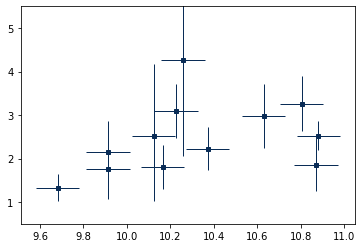

In [19]:
plt.errorbar(masses_S4G, slopes, xerr=0.10, yerr=[err_slopes_lower,err_slopes_upper], fmt='s', ms=4, color='#092c56', elinewidth=1)
plt.ylim(0.5,5.5)

In [17]:
print(pearsonr(masses_S4G, slopes))
print(spearmanr(masses_S4G, slopes))

(0.362083431516568, 0.2474376900762648)
SpearmanrResult(correlation=0.5429080129622184, pvalue=0.06815008508641233)


(0.5, 5.5)

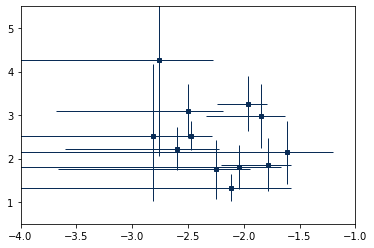

In [37]:
i = 1
plt.errorbar(halo_frac_S4G[i,:], slopes, xerr=lin_err_halo_frac_S4G[i,:,:], yerr=[err_slopes_lower,err_slopes_upper], fmt='s', ms=4, color='#092c56', elinewidth=1)
plt.xlim(-4, -1)
plt.ylim(0.5,5.5)

In [29]:
np.shape(halo_frac_S4G[1,:])

(12,)